In [1]:
from ROOT import TCanvas, TGraph, TH1F, TF1, TRandom3,TFile, gPad, TLegend, gROOT, gStyle, TH2F, TGraphErrors, TLatex, TF2, TMath, TGraphAsymmErrors
from array import array
from tabulate import tabulate
import pandas as pd
import numpy as np
import math

Welcome to JupyROOT 6.26/06


5.834583999999967e+18 1.571908299999947e+20 4.8755233500000944e+19 4.118813899999968e+20


Info in <TCanvas::Print>: pdf file FissionRatesLV_v2.pdf has been created


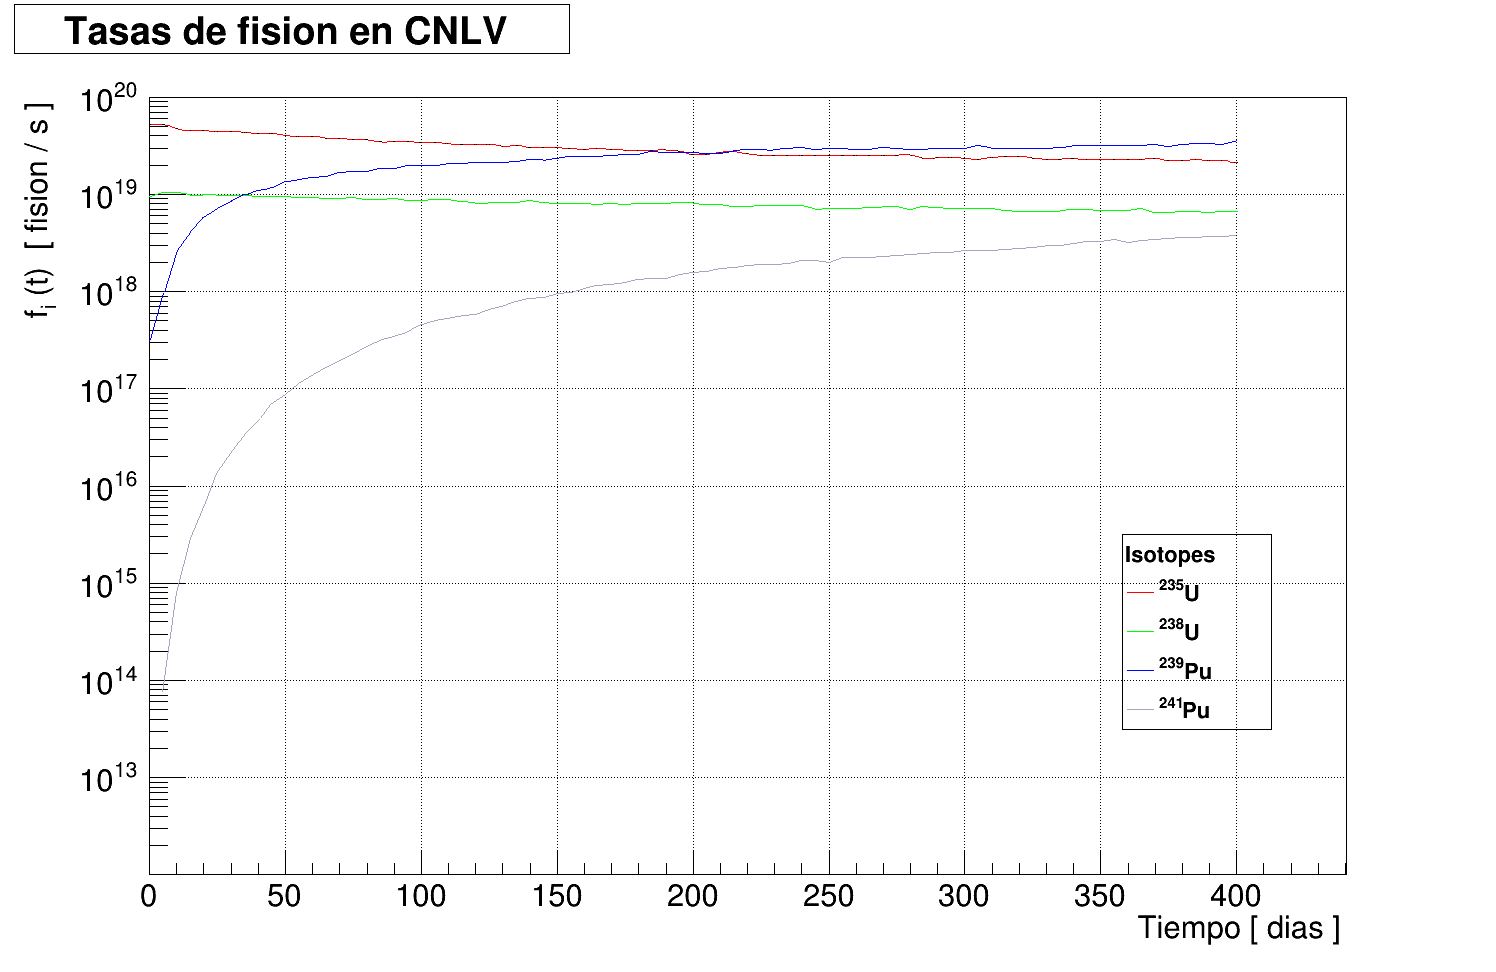

In [2]:
FissionRate_Pu241 = pd.read_csv('Pu241_FissionRate.csv', sep=',').to_numpy()
FissionRates = pd.read_csv('FissionRates.csv', sep=',').to_numpy()

nline = 0
fission_gr_Pu241 = TGraph()

for line in FissionRate_Pu241:
    fission_gr_Pu241.SetPoint(nline, line[0], line[1])
    nline = nline +1

fission_gr_Pu239 = TGraph()
fission_gr_U238  = TGraph()
fission_gr_U235  = TGraph()

nline = 0

for line in FissionRates:
    fission_gr_Pu239.SetPoint(nline, line[0], line[1])
    fission_gr_U238.SetPoint(nline, line[0], line[2])
    fission_gr_U235.SetPoint(nline, line[0], line[3])
    nline = nline +1
                              

iPu241 = fission_gr_Pu241.Integral(50, 390)
iPu239 = fission_gr_Pu239.Integral(50, 390)
iU238  = fission_gr_U238.Integral(50, 390)
iU235  = fission_gr_U235.Integral(50, 390)

iTotal = iPu241 + iPu239 + iU235 + iU238

fission_fraction = array('d',np.array([iPu241, iPu239, iU238, iU235]) / iTotal )

# fission_gr_U235.SetMinimum(0)
fission_gr_U235.SetTitle('Tasas de fision en CNLV; Tiempo [ dias ]; f_{i} (t)  [ fision / s ]')
fission_gr_U235.GetYaxis().SetRangeUser(1e12, 1e20)

fission_gr_U235.SetLineColor(2)
fission_gr_U238.SetLineColor(3)
fission_gr_Pu239.SetLineColor(4)
fission_gr_Pu241.SetLineColor(40)

c1 = TCanvas( 'c1', '', 300, 500, 1500, 1000 ) #(puntos en x,puntos en y, size (X,y))

#c1.SetFillColor( 42 )
c1.SetGrid()
#---------Style-----------
gROOT.SetStyle("Plain")
gStyle.SetOptStat(0)
#gPad.SetLogy(1)  #set the canvas in a log mode in y
#---------Style-----------

fission_gr_U235.Draw('ACP')
fission_gr_U238.Draw('same')
fission_gr_Pu239.Draw('same')
fission_gr_Pu241.Draw('same')
c1.SetLogy()

#-----Se crean las leyendas que a parecen en el Canvas con los datos del ajuste y su probabilidad---
leg = TLegend(0.75, 0.45, 0.85, 0.25, 'Isotopes' )
leg.SetFillStyle(0)
leg.SetBorderSize(1)
leg.SetTextSize(0.025)
leg.AddEntry(fission_gr_U235, '^{235}U', 'l')
leg.AddEntry(fission_gr_U238, '^{238}U', 'l')
leg.AddEntry(fission_gr_Pu239, '^{239}Pu', 'l')
leg.AddEntry(fission_gr_Pu241, '^{241}Pu', 'l')

c1.Update()

c1.Draw()
leg.Draw()
c1.Print('FissionRatesLV_v2.pdf')
print(iPu241, iPu239, iU238, iU235)
# print(fission_fraction)

In [3]:
def flux_gfm_v1( x, par):
    # Enu = x
    Enu = x[0]                  # NOTE: Is elevant that the variables we use to define a function will be  like an array.
    # isotope  = par            #       ROOT takes this variables to evaluate like an array and not like an other type of variable 
    isotope  = par[0]           #       For one variable and one parameter is like this function has been done
    # norm     = par[1]

        #-- To check the normalization factors set the following to "true" and
        #execute the macro build_flux_gfm.C
        #  > root -l 
        #  root [0] .x build_flux_gfm.C
        #The integrals of each flux component will be printed to the screen. 
        #Use these to define norm1 - 5 and normalize to the appropriate neutrino 
        #yield per fission. 

    #chk_FluxNormFactors = False

    # - Normalization factors.

    # norm1 = 0.56*6.14 * 1.0/5.671342
    # norm2 = 0.08*7.08 * 1.0/6.603334
    # norm3 = 0.30*5.58 * 1.0/5.081123
    # norm4 = 0.06*6.42 * 1.0/5.932303
    # norm5 = 0.60*2.00 * 1.0/4.897445e-02

    norm1 = 0.6604240201168279*6.14 * 1.0/5.744204172369749           # Norm U235 
    norm2 = 0.0781757275069056*7.08 * 1.0/6.743183031010241           # Norm U238
    norm3 = 0.2520448905790528*5.58 * 1.0/5.14302846461339            # Norm Pu239
    norm4 = 0.00935536179721383*6.42 * 1.0/6.055599684338839          # Norm Pu241
    norm5 = 0.60*2.00 * 1.0/0.048978952073962856
              

        
    # Fisile Isotopes Fluxes below 2 MeV
    flux_E     = array('d', [0.0, 7.813e-3, 1.563e-2, 3.12e-2, 6.25e-2, 0.125, 0.25, 0.50, 0.75, 1.0, 1.5, 2.0])

    flux_U235  = array('d', [0, 0.024, 0.092, 0.35, 0.61, 1.98, 2.16, 2.66, 2.66, 2.41, 1.69, 1.26])
    flux_U238  = array('d', [0, 0.089, 0.35 , 1.32, 0.65, 2.02, 2.18, 2.91, 2.96, 2.75, 1.97, 1.50])
    flux_Pu239 = array('d', [0, 0.14 , 0.56 , 2.13, 0.64, 1.99, 2.08, 2.63, 2.58, 2.32, 1.48, 1.08])
    flux_Pu241 = array('d', [0, 0.2  , 0.79 , 3.0 , 0.59, 1.85, 2.14, 2.82, 2.90, 2.63, 1.75, 1.32])

    # Normalize to proper neutrino yield 
    for i in range(0,12):
        flux_U235[i]  = flux_U235[i] *norm1
        flux_U238[i]  = flux_U238[i] *norm2
        flux_Pu239[i] = flux_Pu239[i]*norm3
        flux_Pu241[i] = flux_Pu241[i]*norm4

    #Graph sybtaxis in pyROOt 
    #gr = TGraph (n , x , y) n is lens of array,x is the array x, y is an array y gr is the name of the TGraph
    flux_gr_Ele2Mev_U235  = TGraph(12, flux_E, flux_U235)
    flux_gr_Ele2Mev_U238  = TGraph(12,flux_E,flux_U238 )
    flux_gr_Ele2Mev_Pu239 = TGraph(12,flux_E,flux_Pu239)
    flux_gr_Ele2Mev_Pu241 = TGraph(12,flux_E,flux_Pu241)
    flux_gr_Ele2Mev_fiTotal = TGraph(12)
    for i in range(0,12):
        flux_gr_Ele2Mev_fiTotal.SetPoint(i, flux_E[i], flux_U235[i]+flux_U238[i]+flux_Pu239[i]+flux_Pu241[i])

    #Fissile Isotope Fluxes above 2 Mev
    flux_par_Ege2MeV_U235 = TF1("flux_par_Ege2MeV_U235", "[4]*[3]*exp([0]+[1]*x+[2]*x^2)",2,12)
    flux_par_Ege2MeV_U235.SetParameter(0,  0.87 )#(0, 1.260)
    flux_par_Ege2MeV_U235.SetParameter(1, -0.160)
    flux_par_Ege2MeV_U235.SetParameter(2, -0.091)
    flux_par_Ege2MeV_U235.SetParameter(3,  norm1)
    flux_par_Ege2MeV_U235.SetParameter(4, 1.04410)# Smooth factor for U235 

    flux_par_Ege2MeV_U238 = TF1("flux_par_Ege2MeV_U238","[4]*[3]*exp([0]+[1]*x+[2]*x^2)",2,12)
    flux_par_Ege2MeV_U238.SetParameter(0, 0.976)#(0, 1.500)
    flux_par_Ege2MeV_U238.SetParameter(1,-0.162)
    flux_par_Ege2MeV_U238.SetParameter(2,-0.079)
    flux_par_Ege2MeV_U238.SetParameter(3,norm2)
    flux_par_Ege2MeV_U238.SetParameter(4, 1.06710)# Smooth factor for U238

    flux_par_Ege2MeV_Pu239 = TF1("flux_par_Ege2MeV_Pu239","[4]*[3]*exp([0]+[1]*x+[2]*x^2)",2,12)
    flux_par_Ege2MeV_Pu239.SetParameter(0, 0.896)#(0, 1.0800)
    flux_par_Ege2MeV_Pu239.SetParameter(1,-0.2390)
    flux_par_Ege2MeV_Pu239.SetParameter(2,-0.0981)
    flux_par_Ege2MeV_Pu239.SetParameter(3,norm3)
    flux_par_Ege2MeV_Pu239.SetParameter(4, 1.05006)# Smooth factor for Pu239

    flux_par_Ege2MeV_Pu241 = TF1("flux_par_Ege2MeV_Pu241","[4]*[3]*exp([0]+[1]*x+[2]*x^2)",2,12)
    flux_par_Ege2MeV_Pu241.SetParameter(0, 0.793 )#(0, 1.3200)
    flux_par_Ege2MeV_Pu241.SetParameter(1,-0.0800)
    flux_par_Ege2MeV_Pu241.SetParameter(2,-0.1085)
    flux_par_Ege2MeV_Pu241.SetParameter(3,norm4)
    flux_par_Ege2MeV_Pu241.SetParameter(4,1.07561)# Smooth factor for Pu241

    # flux_par_Ege2MeV_Total = TF1("flux_par_Ege2MeV_Total","flux_par_Ege2MeV_U235+flux_par_Ege2MeV_U238+flux_par_Ege2MeV_Pu239+flux_par_Ege2MeV_Pu241",2,12)
    flux_par_Ege2MeV_Total = TF1('flux_par_Ege2MeV_Total', ' [4]*[3]*exp([0]+[1]*x+[2]*x^2) + [9]*[8]*exp([5]+[6]*x+[7]*x^2) + [14]*[13]*exp([10]+[11]*x+[12]*x^2) + [19]*[18]*exp([15]+[16]*x+[17]*x^2)', 2, 12)
    flux_par_Ege2MeV_Total.SetParameter(0,  0.87 )#(0, 1.260)
    flux_par_Ege2MeV_Total.SetParameter(1, -0.160)
    flux_par_Ege2MeV_Total.SetParameter(2, -0.091)
    flux_par_Ege2MeV_Total.SetParameter(3,  norm1)
    flux_par_Ege2MeV_Total.SetParameter(4, 1.04410)# Smooth factor for U235 
    flux_par_Ege2MeV_Total.SetParameter(5,  0.976)#(0, 1.500)
    flux_par_Ege2MeV_Total.SetParameter(6, -0.162)
    flux_par_Ege2MeV_Total.SetParameter(7, -0.079)
    flux_par_Ege2MeV_Total.SetParameter(8,  norm2)
    flux_par_Ege2MeV_Total.SetParameter(9, 1.06710)# Smooth factor for U238
    flux_par_Ege2MeV_Total.SetParameter(10,  0.896)#(0, 1.0800)
    flux_par_Ege2MeV_Total.SetParameter(11,-0.2390)
    flux_par_Ege2MeV_Total.SetParameter(12,-0.0981)
    flux_par_Ege2MeV_Total.SetParameter(13,  norm3)
    flux_par_Ege2MeV_Total.SetParameter(14, 1.05006)# Smooth factor for Pu239
    flux_par_Ege2MeV_Total.SetParameter(15, 0.793 )#(0, 1.3200)
    flux_par_Ege2MeV_Total.SetParameter(16,-0.0800)
    flux_par_Ege2MeV_Total.SetParameter(17,-0.1085)
    flux_par_Ege2MeV_Total.SetParameter(18,  norm4)
    flux_par_Ege2MeV_Total.SetParameter(19,1.07561)# Smooth factor for Pu241
    
    
    n_capture = open('ncaptureSpectrum-texono.csv', 'r')

    nline = 0
    flux_gr_Ele2MeV_ncU238v2 = TGraph()
    for line in n_capture:
        ee = float(line.split(' ')[0]) 
        ff = float(line.split(' ')[1])
        flux_gr_Ele2MeV_ncU238v2.SetPoint(nline, ee, norm5*pow(10,ff))
        nline = nline +1

    ff = 0

    if isotope == 0: #Total flux (fission + n-capture)
        if Enu < 1.3:
            ff = flux_gr_Ele2MeV_ncU238v2.Eval(Enu)+flux_gr_Ele2Mev_fiTotal.Eval(Enu)
        elif Enu < 2:
            ff = flux_gr_Ele2Mev_fiTotal.Eval(Enu)
        else:
            ff = flux_par_Ege2MeV_Total.Eval(Enu)
    elif isotope == 1: #Flux from U235 fission
        if Enu < 2:
            ff = flux_gr_Ele2Mev_U235.Eval(Enu)
        else:
            ff = flux_par_Ege2MeV_U235.Eval(Enu)
    elif isotope == 2: #Flux from U238 fisiion
        if Enu < 2:
            ff = flux_gr_Ele2Mev_U238.Eval(Enu)
        else:
            ff = flux_par_Ege2MeV_U238.Eval(Enu)
    elif isotope == 3: #Flux from Pu239 fission
        if Enu < 2:
            ff = flux_gr_Ele2Mev_Pu239.Eval(Enu)
        else:
            ff = flux_par_Ege2MeV_Pu239.Eval(Enu)
    elif isotope == 4: #Flux from Pu241 fission
        if Enu < 2:
            ff = flux_gr_Ele2Mev_Pu241.Eval(Enu)
        else:
            ff = flux_par_Ege2MeV_Pu241.Eval(Enu)
    elif isotope == 5: #Flux from n-capture on U238
        if Enu < 1.2:
            ff = flux_gr_Ele2MeV_ncU238v2.Eval(Enu)
        else:
            ff = 0.0
    elif isotope == 6:
        if Enu < 2:
            ff = flux_gr_Ele2Mev_fiTotal.Eval(Enu)
        else:
            ff = flux_par_Ege2MeV_Total.Eval(Enu)

    return ff

if1 = 4.055003483517312
if2 = 0.5534841507488952
if3 = 1.4064104894311071
if4 = 0.060061422738112644
if5 = 1.2000000000000022


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


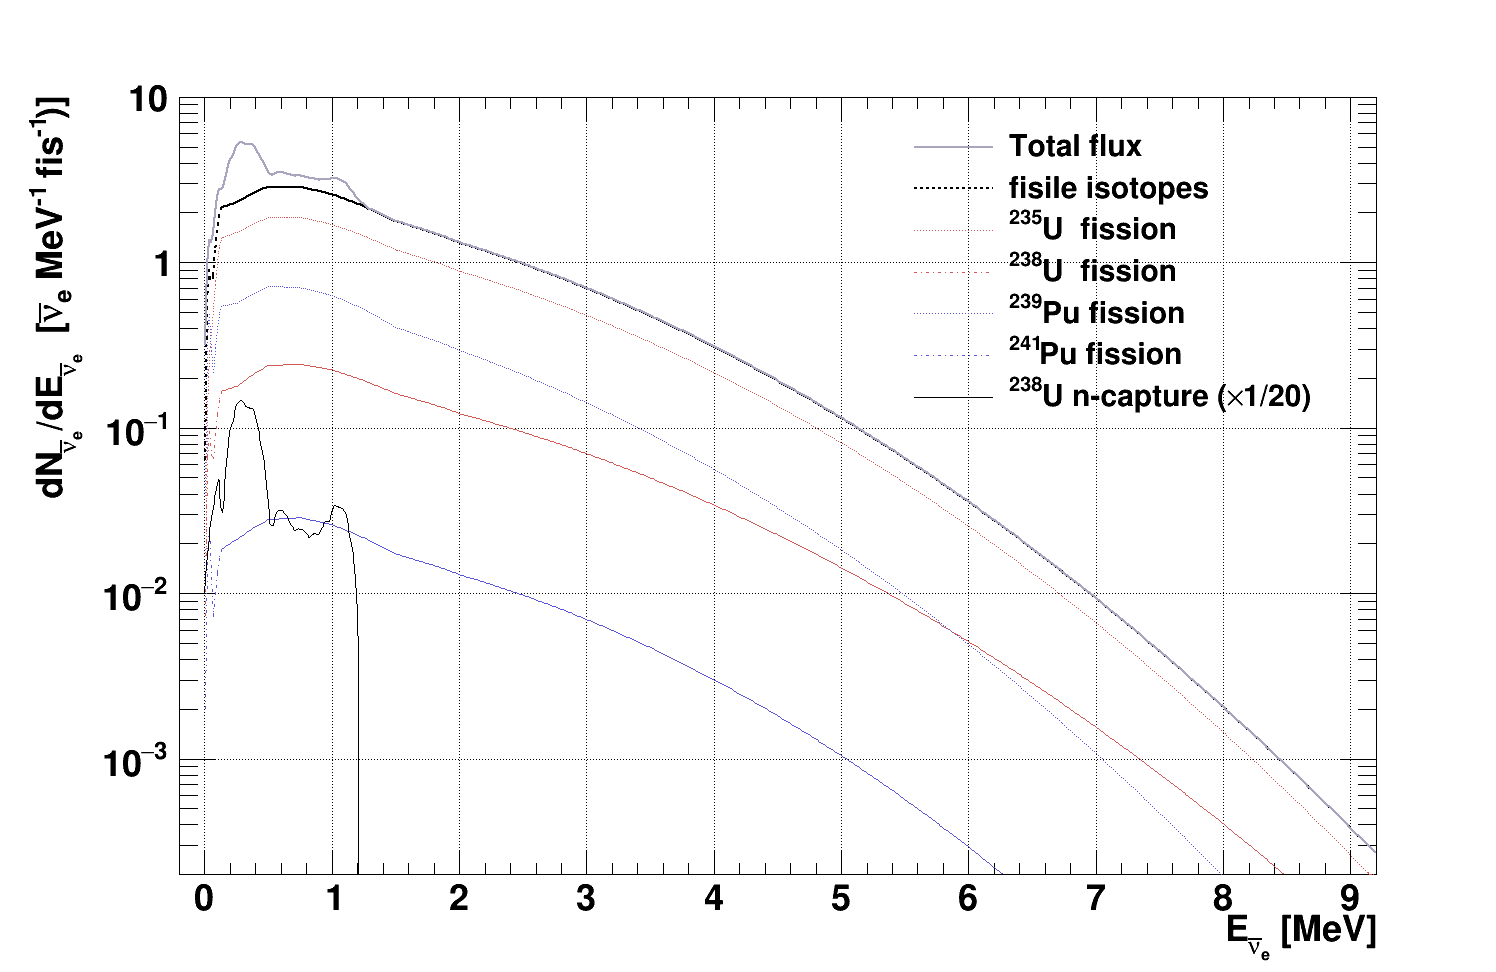

In [4]:
f0 = TF1("f0", flux_gfm_v1,  0, 12, 1)
f1 = TF1("f1", flux_gfm_v1,  0, 12, 1)
f2 = TF1("f2", flux_gfm_v1,  0, 12, 1)
f3 = TF1("f3", flux_gfm_v1,  0, 12, 1)
f4 = TF1("f4", flux_gfm_v1,  0, 12, 1)
f5 = TF1("f5", flux_gfm_v1,  0, 12, 1)
f6 = TF1("f6", flux_gfm_v1,  0, 12, 1)

f0.SetParameter(0, 0) #Total
f1.SetParameter(0, 1) #U235
f2.SetParameter(0, 2) #U238
f3.SetParameter(0, 3) #Pu239
f4.SetParameter(0, 4) #Pu241
f5.SetParameter(0, 5) #n -Cap
f6.SetParameter(0, 6) #Tot - fis 

ns = 5000

x = array('d', [0.0] * ns) 
w = array('d', [0.0] * ns) 
#print(x, w)

f1.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
f2.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
f3.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
f4.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
f5.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
f6.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)

# print(x, w)
x1 = np.array(x)
w1 = np.array(w)


if1 = f1.IntegralFast(ns, x, w, 0.0, 8.0)
if2 = f2.IntegralFast(ns, x, w, 0, 8)
if3 = f3.IntegralFast(ns, x, w, 0, 8)
if4 = f4.IntegralFast(ns, x, w, 0, 8)
if5 = f5.IntegralFast(ns, x, w, 0, 8)
if6 = f6.IntegralFast(ns, x, w, 0, 8)



print("if1 =", if1 )
print("if2 =", if2 )
print("if3 =", if3 )
print("if4 =", if4 )
print("if5 =", if5 )


f0.SetNpx(600)
f1.SetNpx(600)
f2.SetNpx(600)
f3.SetNpx(600)
f4.SetNpx(600)
f5.SetNpx(400)
f6.SetNpx(600)


#---------Style-----------
gROOT.SetStyle("Plain")
gStyle.SetOptStat(0)
#---------Style-----------

#-Scaled version of f5 (n-Cap), for drawing
sf = 1/20.
f5sg = TGraph()
fin = f5.GetNpx()
for i in range(0,fin):
    xx = 0.0 + i*(1.3-0.)/(200-1)
    f5sg.SetPoint(i, xx, sf*f5.Eval(xx))
    
f5sg.SetPoint(fin, 1.3, 0)

f0.SetLineColor( 40)
f0.SetLineStyle( 1)
f0.SetLineWidth( 2)

f1.SetLineColor(50)
f1.SetLineStyle( 3)
f1.SetLineWidth( 1)

f2.SetLineColor(50)
f2.SetLineStyle( 4)
f2.SetLineWidth( 1)

f3.SetLineColor( 9)
f3.SetLineStyle( 3)
f3.SetLineWidth( 1)

f4.SetLineColor( 9)
f4.SetLineStyle( 4)
f4.SetLineWidth( 1)

f5.SetLineColor( 1)
f5.SetLineStyle( 1)
f5.SetLineWidth( 1)

f5sg.SetLineColor( 1)
f5sg.SetLineStyle( 1)
f5sg.SetLineWidth( 1)

f6.SetLineColor( 1)
f6.SetLineStyle( 2)
f6.SetLineWidth( 2)

flux_frame = TH2F("flux_frame","",1,-0.2,9.2,1,2e-4,10)
flux_frame.GetXaxis().SetTitle("E_{#bar{#nu}_{e}} [MeV]")
flux_frame.GetYaxis().SetTitle("dN_{#bar{#nu}_{e}}/dE_{#bar{#nu}_{e}}  [#bar{#nu}_{e} MeV^{-1} fis^{-1})]")
flux_frame.GetYaxis().SetTitleOffset(1.3)

leg = TLegend(0.6,0.57,0.9,0.87)
leg.SetFillStyle(0)
leg.SetBorderSize(0)
leg.AddEntry(f0,"Total flux","l")
leg.AddEntry(f6,"fisile isotopes","l")
leg.AddEntry(f1,"^{235}U  fission","l")
leg.AddEntry(f2,"^{238}U  fission","l")
leg.AddEntry(f3,"^{239}Pu fission ","l")
leg.AddEntry(f4,"^{241}Pu fission","l")
leg.AddEntry(f5sg,"^{238}U n-capture (#times1/20)","l")


c1 = TCanvas( 'c1', '', 300, 500, 1500, 1000 ) #(puntos en x,puntos en y, size (X,y))

#c1.SetFillColor( 42 )
c1.SetGrid()


# canv = TCanvas("canv", "", 650, 450)
# canv.cd()

gPad.SetLeftMargin(0.12)
gPad.SetRightMargin(0.08)
gPad.SetLogy(1)
gPad.SetTicks(1,1)
flux_frame.Draw()
f1.Draw(" Csame")
f2.Draw(" same")
f3.Draw(" same")
f4.Draw(" same")
f5sg.Draw("C same")
f6.Draw(" same")
f0.Draw(" same")
leg.Draw()


c1.Draw()
# c1.Print('AntineutrinoFLuxLV.pdf')


In [8]:
# Some physical Constants

c_pi        = 3.141592653589793238           # Pi number 
DeltaMnp    = 1.2933 #MeV
mel         = 0.511 #MeV
N_avo       = 6.022e23                       # Avogadro's Number
MeV_per_amu = 931.494095              # Conversion MeV per amu for natural units 
G_F         = 1.1663787e-11 #(Mev^-2)        # Fermi Constant  
hbarc       = 197.326e-13   #Mev cm          # conversion of natural units  (Not sure)
sinsqqw     = 0.231#(sin qw)^2 approx       # Weak mixing Angle
Si_amu      = 28.085  # g / mol              # Mass of Silicon
# M_Si        = 2.91085247e-13                 #MeV Mass of the Si in MeV
M_Si        = MeV_per_amu * Si_amu
knn = (G_F**2) / (2*c_pi)                    # Constant Fermi square part 2 times pi 
Z = Si_amu -14                               # Number of Protons 
N = 14                                       # Number of neutrons 


hbar = 6.582119569e-16          # eV*s
c    = 29979245800              # cm/s

In [10]:
def NuclearNorm(r):
    P_LV   = 2.027 # GW   Power of Laguna Verde Nuclear Reactor
    P_ININ = 1     # GW   Power of ININ Nuclear Reactor

    J_to_eV = 1/1.602176602176634e-19

    GW_to_eV  = 1e9 * J_to_eV  # eV/s  Conversion Giga Watts to eV per second 
    e_fis = 206.2e6    # eV /fis  -> Approx energy per fission
    N_nu = 7.25         # neutrinos/fission  Approx of number of neutrinos produce a fission  

    R_fis_LV   = (P_LV * GW_to_eV) / e_fis 
    R_fis_ININ = (P_ININ * GW_to_eV) / e_fis


    R_nu_LV   = N_nu * R_fis_LV         # Neutrinos / (fision*second)  for nuclear reactor Laguna Verde 
    R_nu_ININ = N_nu * R_fis_ININ       # Neutrinos / (fision*second)  for nuclear reactor ININ


    # r =  array('d', [300,500,1000,1500,2000,2500,3000])
    

    # Flux_LV   = R_nu_LV / (math.pi * 4 * pow( np.array(r) , 2))        #Flux [ve / s cm^2] for nuclear reactor Laguna Verde 
    # Flux_ININ = R_nu_ININ / (math.pi * 4 * pow( np.array(r) , 2))      #Flux [ve / s cm^2] for nuclear reactor ININ

    Flux_LV   = R_fis_LV / (math.pi * 4 * pow(r , 2))  
    
    return Flux_LV

NuclearNorm(1500)




2170012924542.5645

In [11]:

def Nt(Mdet):       # The variable used is the Mass of the detector, we are using
    N_t   = (Mdet * N_avo)/ Si_amu

    return N_t

Nt(1000)            # For example, here we are dealing with 1000g of Silicon

2.1442050916859535e+25

In [12]:
def formfact(x, par):                   # This function is the form Factor, is of one variable and two parameters the first is the Mass of the Silicon, the second parameter is 
                                        # the sum of protons and neutrons of the Silicon
    
    T = x[0]
    mN = par[0]
    A  = par[1]

    kappa  = math.sqrt(2*mN*T) / (hbarc*1e13)      # Converted hbarc to MeV/fm  -> kappa in fm^-1  
    s      = 1.0                                    # fm
    R      = 1.2 * pow(A , 1/3)                     # fm
    r      = math.sqrt( R**2 - 5*(s**2))            # fm
    ff     = 3 * math.exp( -0.5 *kappa**2 * s**2) * (math.sin(kappa*r) - kappa*r*math.cos(kappa*r)) / (kappa*r)**3

    return ff

formfact([5.89635218], [Si_amu, Si_amu])

0.9887397328600284

In [13]:
#Function Double-Differential event rate in a TF1
def dSigdT_f1 (x, par):
    Enu = x [0]
    T  = par[0]
  
    #Form Factor 
    fofa = TF1 ("fofa", formfact, 0.1, 1e3, 2)
    fofa.SetParameter(0,Si_amu)
    fofa.SetParameter(1, Si_amu)
    Ff = fofa.Eval(T)
    # print(Ff)

    # Ff = 1
        
    # val = knn * M_Si * (hbarc**2) * (2 - 2*(T/Enu) + (T/Enu)**2 - ((M_Si*T)/Enu**2)) * ((N-Z*(1-4*sinsqqw))**2) * (Ff**2) * (1/4)
    val = knn * M_Si * (math.pow(hbarc,2)) * (2 - 2*(T/Enu) + math.pow((T/Enu),2) - ((M_Si*T)/math.pow(Enu,2))) * (math.pow((N-Z*(1-4*sinsqqw)),2)) * (math.pow(Ff,2)) * (1/4)
    # val = knn * M_Si * (2 - 2*(T/Enu) + (T/Enu)**2 - (M_Si*T/Enu**2)) * ((N-Z*(1-4*sinsqqw))**2) * (Ff**2) * (1/4)
    
    return val


In [14]:
def ddRate(x, par):
    Enu = x[0]
    T   = par[0]

    loE = 0.5*( T + math.sqrt(math.pow(T,2)+2*T*M_Si))
    hiE = 10

    #---Cross Section--------

    dSigdT = TF1("dSigdT", dSigdT_f1,  loE, hiE, 1)
    dSigdT.SetParameter(0, T)

    #----Flux-----------------    
    fluxE = TF1 ("fluxE", flux_gfm_v1, loE, hiE, 1)
    fluxE.SetParameter(0,0)


    ddr = 0.0   

    if Enu > loE:
        # ddr = fluxE.Eval(Enu) * dSigdT.Eval(Enu)                                      # Double differential rate without mass detector and Nuclear Norm
        # ddr = Nt(1000) * fluxE.Eval(Enu) * dSigdT.Eval(Enu)                             # Double differential rate without Nuclear Norm
        ddr = NuclearNorm(1500) * fluxE.Eval(Enu) * dSigdT.Eval(Enu)                    # # Double differential rate without mass detector 
        # ddr = NuclearNorm(1500) * Nt(1000) * fluxE.Eval(Enu) * dSigdT.Eval(Enu)         # Double differential rate with mass detector and Nuclear norm 

    return ddr


In [15]:
T = array('d', [10e-3, 9e-3, 8e-3, 7e-3, 6e-3, 5e-3, 4e-3, 3e-3, 2.5e-3, 2e-3, 1.6e-3, 1.3e-3 ,1e-3, 
                9e-4, 8e-4, 7e-4, 6e-4, 5e-4, 4e-4, 3e-4, 2e-4, 1e-4, 
                9e-5, 8e-5, 7e-5, 6e-5, 5e-5, 4e-5, 3e-5, 2e-5, 1e-5, 
                9e-6, 8e-6, 7e-6, 6e-6, 5e-6, 4e-6, 3e-6, 2e-6, 1e-6,
                9e-7, 8e-7, 7e-7, 6e-7, 5e-7, 4e-7, 3e-7, 2e-7, 1e-7])

Emin = array('d', 0.5*( np.array(T) + np.sqrt(np.power(np.array(T),2)+2*np.array(T)*M_Si))) 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


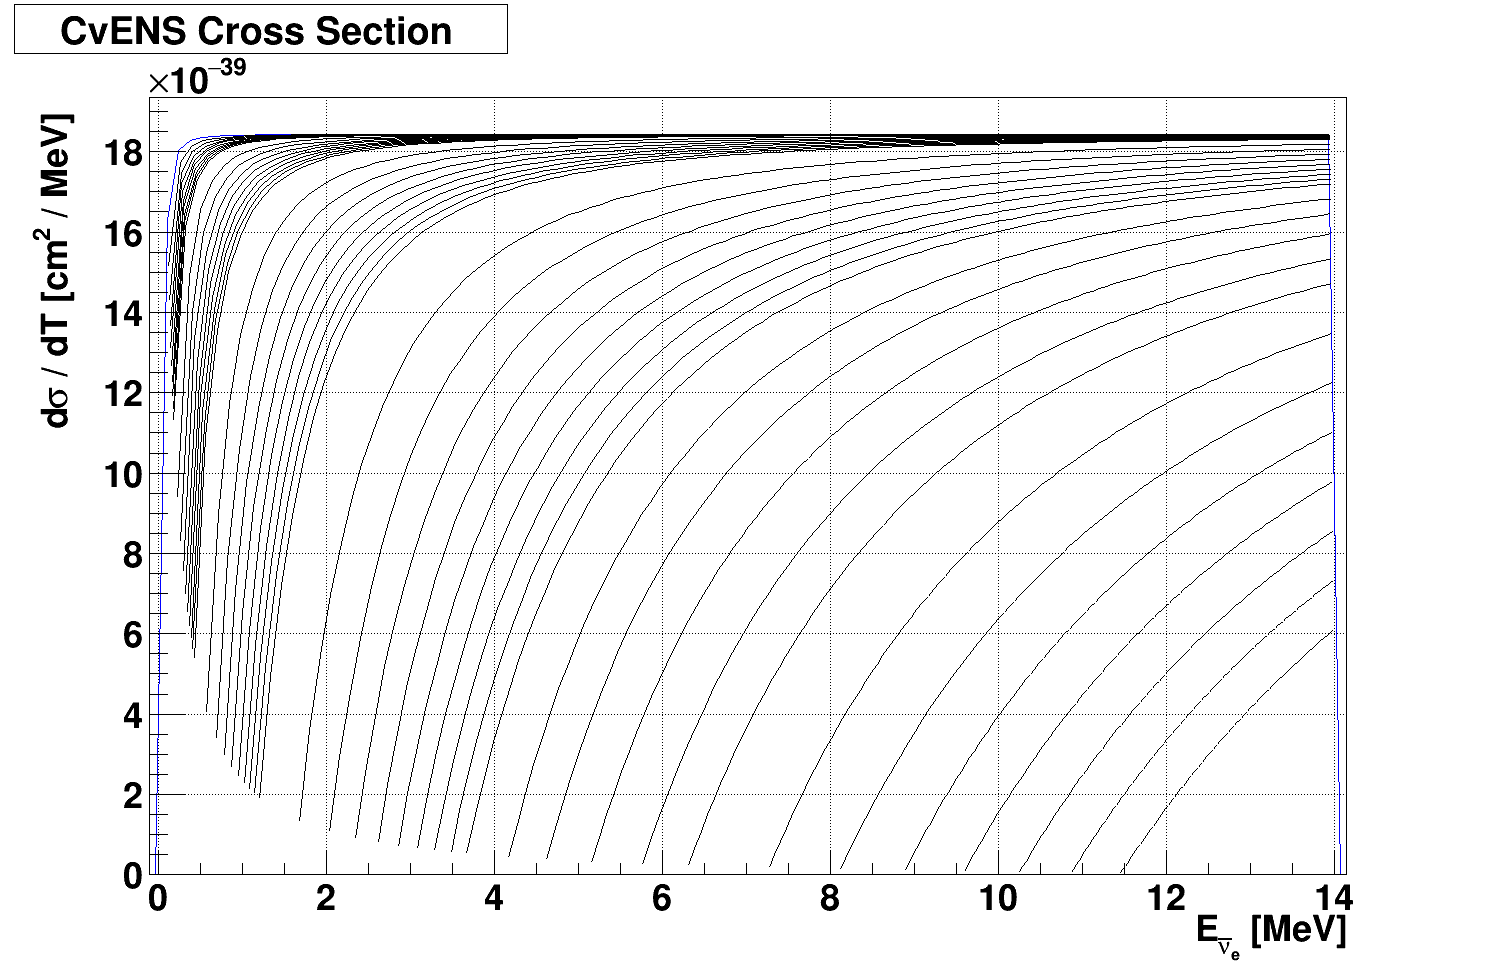

In [16]:
dSigdT1 = TF1('dSigdT1', dSigdT_f1, Emin[0], 14, 1)
dSigdT2 = TF1('dSigdT2', dSigdT_f1, Emin[1], 14, 1)
dSigdT3 = TF1('dSigdT3', dSigdT_f1, Emin[2], 14, 1)
dSigdT4 = TF1('dSigdT4', dSigdT_f1, Emin[3], 14, 1)
dSigdT5 = TF1('dSigdT5', dSigdT_f1, Emin[4], 14, 1)
dSigdT6 = TF1('dSigdT6', dSigdT_f1, Emin[5], 14, 1)
dSigdT7 = TF1('dSigdT7', dSigdT_f1, Emin[6], 14, 1)
dSigdT8 = TF1('dSigdT8', dSigdT_f1, Emin[7], 14, 1)
dSigdT9 = TF1('dSigdT9', dSigdT_f1, Emin[8], 14, 1)
dSigdT10 = TF1('dSigdT10', dSigdT_f1, Emin[9], 14, 1)
dSigdT11 = TF1('dSigdT11', dSigdT_f1, Emin[10], 14, 1)
dSigdT12 = TF1('dSigdT12', dSigdT_f1, Emin[11], 14, 1)
dSigdT13 = TF1('dSigdT13', dSigdT_f1, Emin[12], 14, 1)
dSigdT14 = TF1('dSigdT14', dSigdT_f1, Emin[13], 14, 1)
dSigdT15 = TF1('dSigdT15', dSigdT_f1, Emin[14], 14, 1)
dSigdT16 = TF1('dSigdT16', dSigdT_f1, Emin[15], 14, 1)
dSigdT17 = TF1('dSigdT17', dSigdT_f1, Emin[16], 14, 1)
dSigdT18 = TF1('dSigdT18', dSigdT_f1, Emin[17], 14, 1)
dSigdT19 = TF1('dSigdT19', dSigdT_f1, Emin[18], 14, 1)
dSigdT20 = TF1('dSigdT20', dSigdT_f1, Emin[19], 14, 1)
dSigdT21 = TF1('dSigdT10', dSigdT_f1, Emin[20], 14, 1)
dSigdT22 = TF1('dSigdT12', dSigdT_f1, Emin[21], 14, 1)
dSigdT23 = TF1('dSigdT13', dSigdT_f1, Emin[22], 14, 1)
dSigdT24 = TF1('dSigdT14', dSigdT_f1, Emin[23], 14, 1)
dSigdT25 = TF1('dSigdT15', dSigdT_f1, Emin[24], 14, 1)
dSigdT26 = TF1('dSigdT16', dSigdT_f1, Emin[25], 14, 1)
dSigdT27 = TF1('dSigdT17', dSigdT_f1, Emin[26], 14, 1)
dSigdT28 = TF1('dSigdT18', dSigdT_f1, Emin[27], 14, 1)
dSigdT29 = TF1('dSigdT19', dSigdT_f1, Emin[28], 14, 1)
dSigdT30 = TF1('dSigdT20', dSigdT_f1, Emin[29], 14, 1)
dSigdT31 = TF1('dSigdT10', dSigdT_f1, Emin[30], 14, 1)
dSigdT32 = TF1('dSigdT12', dSigdT_f1, Emin[31], 14, 1)
dSigdT33 = TF1('dSigdT13', dSigdT_f1, Emin[32], 14, 1)
dSigdT34 = TF1('dSigdT14', dSigdT_f1, Emin[33], 14, 1)
dSigdT35 = TF1('dSigdT15', dSigdT_f1, Emin[34], 14, 1)
dSigdT36 = TF1('dSigdT16', dSigdT_f1, Emin[35], 14, 1)
dSigdT37 = TF1('dSigdT17', dSigdT_f1, Emin[36], 14, 1)
dSigdT38 = TF1('dSigdT18', dSigdT_f1, Emin[37], 14, 1)
dSigdT39 = TF1('dSigdT19', dSigdT_f1, Emin[38], 14, 1)
dSigdT40 = TF1('dSigdT20', dSigdT_f1, Emin[39], 14, 1)
dSigdT41 = TF1('dSigdT11', dSigdT_f1, Emin[40], 14, 1)
dSigdT42 = TF1('dSigdT12', dSigdT_f1, Emin[41], 14, 1)
dSigdT43 = TF1('dSigdT13', dSigdT_f1, Emin[42], 14, 1)
dSigdT44 = TF1('dSigdT14', dSigdT_f1, Emin[43], 14, 1)
dSigdT45 = TF1('dSigdT15', dSigdT_f1, Emin[44], 14, 1)
dSigdT46 = TF1('dSigdT16', dSigdT_f1, Emin[45], 14, 1)
dSigdT47 = TF1('dSigdT17', dSigdT_f1, Emin[46], 14, 1)
dSigdT48 = TF1('dSigdT18', dSigdT_f1, Emin[47], 14, 1)
dSigdT49 = TF1('dSigdT19', dSigdT_f1, Emin[48], 14, 1)


dSigdT1.SetParameter(0, T[0])
dSigdT2.SetParameter(0, T[1])
dSigdT3.SetParameter(0, T[2])
dSigdT4.SetParameter(0, T[3])
dSigdT5.SetParameter(0, T[4])
dSigdT6.SetParameter(0, T[5])
dSigdT7.SetParameter(0, T[6])
dSigdT8.SetParameter(0, T[7])
dSigdT9.SetParameter(0, T[8])
dSigdT10.SetParameter(0, T[9])
dSigdT11.SetParameter(0, T[10])
dSigdT12.SetParameter(0, T[11])
dSigdT13.SetParameter(0, T[12])
dSigdT14.SetParameter(0, T[13])
dSigdT15.SetParameter(0, T[14])
dSigdT16.SetParameter(0, T[15])
dSigdT17.SetParameter(0, T[16])
dSigdT18.SetParameter(0, T[17])
dSigdT19.SetParameter(0, T[18])
dSigdT20.SetParameter(0, T[19])
dSigdT21.SetParameter(0, T[20])
dSigdT22.SetParameter(0, T[21])
dSigdT23.SetParameter(0, T[22])
dSigdT24.SetParameter(0, T[23])
dSigdT25.SetParameter(0, T[24])
dSigdT26.SetParameter(0, T[25])
dSigdT27.SetParameter(0, T[26])
dSigdT28.SetParameter(0, T[27])
dSigdT29.SetParameter(0, T[28])
dSigdT30.SetParameter(0, T[29])
dSigdT31.SetParameter(0, T[30])
dSigdT32.SetParameter(0, T[31])
dSigdT33.SetParameter(0, T[32])
dSigdT34.SetParameter(0, T[33])
dSigdT35.SetParameter(0, T[34])
dSigdT36.SetParameter(0, T[35])
dSigdT37.SetParameter(0, T[36])
dSigdT38.SetParameter(0, T[37])
dSigdT39.SetParameter(0, T[38])
dSigdT40.SetParameter(0, T[39])
dSigdT41.SetParameter(0, T[40])
dSigdT42.SetParameter(0, T[41])
dSigdT43.SetParameter(0, T[42])
dSigdT44.SetParameter(0, T[43])
dSigdT45.SetParameter(0, T[44])
dSigdT46.SetParameter(0, T[45])
dSigdT47.SetParameter(0, T[46])
dSigdT48.SetParameter(0, T[47])
dSigdT49.SetParameter(0, T[48])


dSigdT49.SetLineColor(4)

c1 = TCanvas( 'c1', '', 300, 500, 1500, 1000 ) #(puntos en x,puntos en y, size (X,y))
#c1 = TCanvas()

#c1.SetFillColor( 42 )
c1.SetGrid()
#---------Style-----------
gROOT.SetStyle("Plain")
gStyle.SetOptStat(0)
#gPad.SetLogy(1)  #set the canvas in a log mode in y
#---------Style-----------
latex = TLatex()


dSigdT49.Draw()
dSigdT49.GetXaxis().SetRangeUser(0, 16)
# dSigdT49.GetYaxis().SetRangeUser(0,20e-39)
dSigdT49.SetTitle('CvENS Cross Section; E_{#bar{#nu}_{e}} [MeV]; d#sigma / dT [cm^{2} / MeV] ')

dSigdT1.SetLineWidth(1)
dSigdT2.SetLineWidth(1)
dSigdT3.SetLineWidth(1)
dSigdT4.SetLineWidth(1)
dSigdT5.SetLineWidth(1)
dSigdT6.SetLineWidth(1)
dSigdT7.SetLineWidth(1)
dSigdT8.SetLineWidth(1)
dSigdT9.SetLineWidth(1)
dSigdT10.SetLineWidth(1)
dSigdT11.SetLineWidth(1)
dSigdT12.SetLineWidth(1)
dSigdT13.SetLineWidth(1)
dSigdT14.SetLineWidth(1)
dSigdT15.SetLineWidth(1)
dSigdT16.SetLineWidth(1)
dSigdT17.SetLineWidth(1)
dSigdT18.SetLineWidth(1)
dSigdT19.SetLineWidth(1)
dSigdT20.SetLineWidth(1)
dSigdT21.SetLineWidth(1)
dSigdT22.SetLineWidth(1)
dSigdT23.SetLineWidth(1)
dSigdT24.SetLineWidth(1)
dSigdT25.SetLineWidth(1)
dSigdT26.SetLineWidth(1)
dSigdT27.SetLineWidth(1)
dSigdT28.SetLineWidth(1)
dSigdT29.SetLineWidth(1)
dSigdT30.SetLineWidth(1)
dSigdT31.SetLineWidth(1)
dSigdT32.SetLineWidth(1)
dSigdT33.SetLineWidth(1)
dSigdT34.SetLineWidth(1)
dSigdT35.SetLineWidth(1)
dSigdT36.SetLineWidth(1)
dSigdT37.SetLineWidth(1)
dSigdT38.SetLineWidth(1)
dSigdT39.SetLineWidth(1)
dSigdT40.SetLineWidth(1)
dSigdT41.SetLineWidth(1)
dSigdT42.SetLineWidth(1)
dSigdT43.SetLineWidth(1)
dSigdT44.SetLineWidth(1)
dSigdT45.SetLineWidth(1)
dSigdT46.SetLineWidth(1)
dSigdT47.SetLineWidth(1)
dSigdT48.SetLineWidth(1)
dSigdT49.SetLineWidth(1)

dSigdT1.Draw('same')
dSigdT2.Draw('same')
dSigdT3.Draw('same')
dSigdT4.Draw('same')
dSigdT5.Draw('same')
dSigdT6.Draw('same')
dSigdT7.Draw('same')
dSigdT8.Draw('same')
dSigdT9.Draw('same')
dSigdT10.Draw('same')
dSigdT11.Draw('same')
dSigdT12.Draw('same')
dSigdT13.Draw('same')
dSigdT14.Draw('same')
dSigdT15.Draw('same')
dSigdT16.Draw('same')
dSigdT17.Draw('same')
dSigdT18.Draw('same')
dSigdT19.Draw('same')
dSigdT20.Draw('same')
dSigdT21.Draw('same')
dSigdT22.Draw('same')
dSigdT23.Draw('same')
dSigdT24.Draw('same')
dSigdT25.Draw('same')
dSigdT26.Draw('same')
dSigdT27.Draw('same')
dSigdT28.Draw('same')
dSigdT29.Draw('same')
dSigdT30.Draw('same')
dSigdT31.Draw('same')
dSigdT32.Draw('same')
dSigdT33.Draw('same')
dSigdT34.Draw('same')
dSigdT35.Draw('same')
dSigdT36.Draw('same')
dSigdT37.Draw('same')
dSigdT38.Draw('same')
dSigdT39.Draw('same')
dSigdT40.Draw('same')
dSigdT41.Draw('same')
dSigdT42.Draw('same')
dSigdT43.Draw('same')
dSigdT44.Draw('same')
dSigdT45.Draw('same')
dSigdT46.Draw('same')
dSigdT47.Draw('same')
dSigdT48.Draw('same')

c1.Update()
c1.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


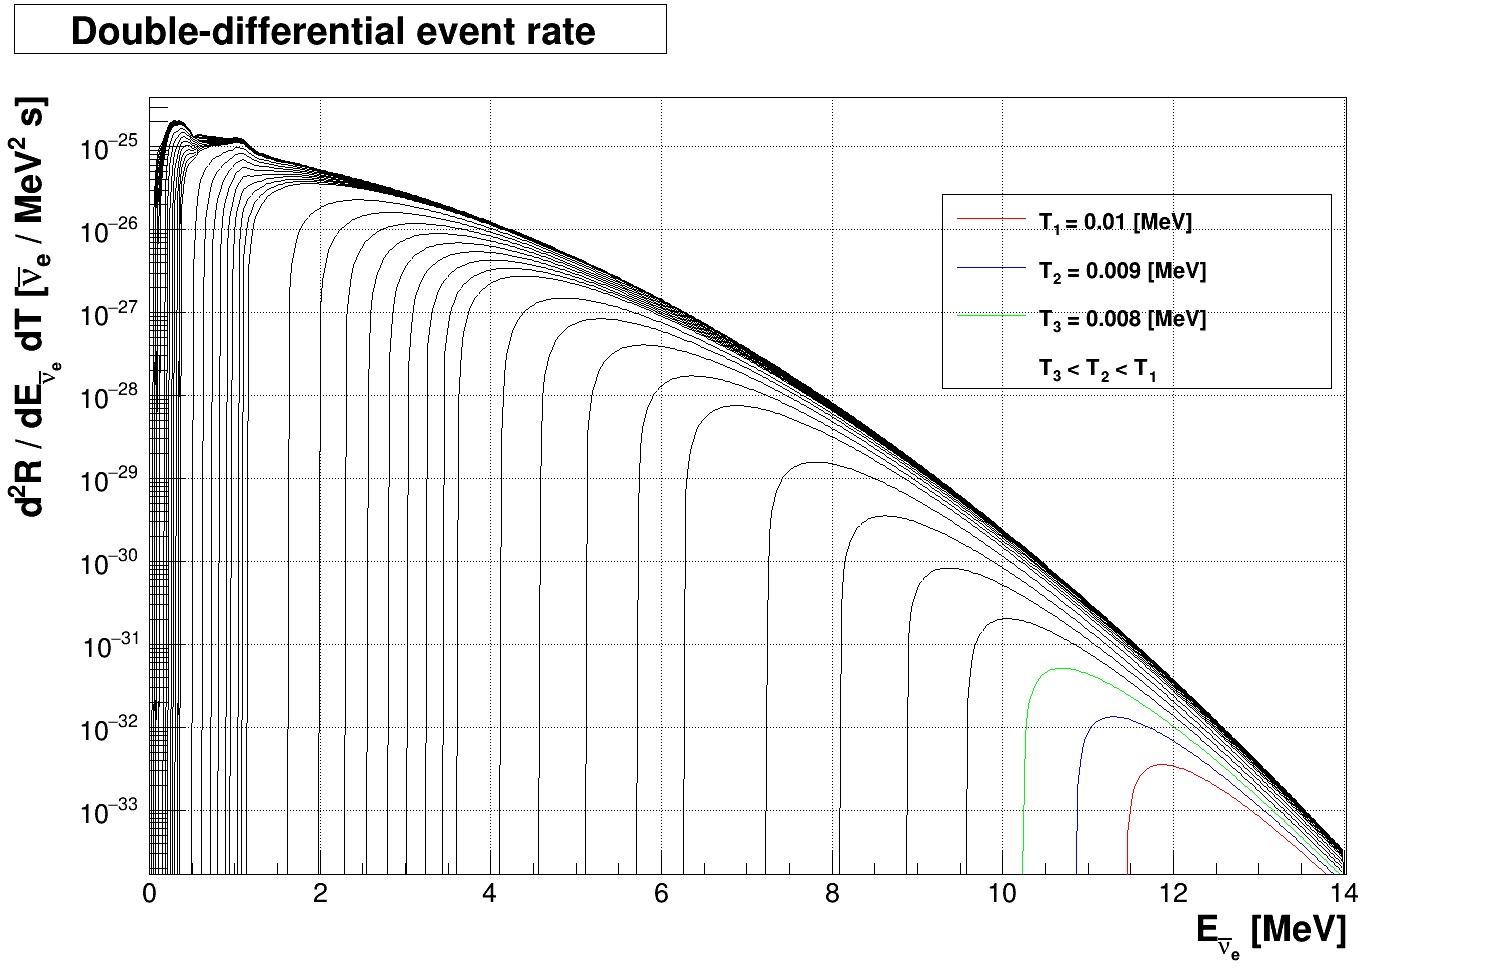

In [17]:
fddRate1 = TF1("fddRate1", ddRate, 0, 14, 1)
fddRate1.SetParameter(0,T[0])
fddRate1.SetNpx(500)
fddRate1.SetLineWidth(1)
fddRate1.SetLineColor(2)

fddRate2 = TF1("fddRate2", ddRate, 0, 14, 1)
fddRate2.SetParameter(0,T[1])
fddRate2.SetNpx(500)
fddRate2.SetLineWidth(1)
fddRate2.SetLineColor(4)

fddRate3 = TF1("fddRate3", ddRate, 0, 14, 1)
fddRate3.SetParameter(0,T[2])
fddRate3.SetNpx(500)
fddRate3.SetLineWidth(1)
fddRate3.SetLineColor(3)

fddRate4 = TF1("fddRate4", ddRate, 0, 14, 1)
fddRate4.SetParameter(0, T[3])
fddRate4.SetNpx(500)
fddRate4.SetLineWidth(1)

fddRate5 = TF1("fddRate5", ddRate, 0, 14, 1)
fddRate5.SetParameter(0,T[4])
fddRate5.SetNpx(500)
fddRate5.SetLineWidth(1)

fddRate6 = TF1("fddRate6", ddRate, 0, 14, 1)
fddRate6.SetParameter(0,T[5])
fddRate6.SetNpx(500)
fddRate6.SetLineWidth(1)

fddRate7 = TF1("fddRate7", ddRate, 0, 14, 1)
fddRate7.SetParameter(0,T[6])
fddRate7.SetNpx(500)
fddRate7.SetLineWidth(1)

fddRate8 = TF1("fddRate8", ddRate, 0, 14, 1)
fddRate8.SetParameter(0,T[7])
fddRate8.SetNpx(500)
fddRate8.SetLineWidth(1)

fddRate9 = TF1("fddRate9", ddRate, 0, 14, 1)
fddRate9.SetParameter(0,T[8])
fddRate9.SetNpx(500)
fddRate9.SetLineWidth(1)

fddRate10 = TF1("fddRate10", ddRate, 0, 14, 1)
fddRate10.SetParameter(0,T[9])
fddRate10.SetNpx(500)
fddRate10.SetLineWidth(1)

fddRate11 = TF1("fddRate11", ddRate, 0, 14, 1)
fddRate11.SetParameter(0,T[10])
fddRate11.SetNpx(500)
fddRate11.SetLineWidth(1)

fddRate12 = TF1("fddRate12", ddRate, 0, 14, 1)
fddRate12.SetParameter(0,T[11])
fddRate12.SetNpx(500)
fddRate12.SetLineWidth(1)


fddRate13 = TF1("fddRate13", ddRate, 0, 14, 1)
fddRate13.SetParameter(0,T[12])
fddRate13.SetNpx(500)
fddRate13.SetLineWidth(1)

fddRate14 = TF1("fddRate14", ddRate, 0, 14, 1)
fddRate14.SetParameter(0,T[13])
fddRate14.SetNpx(500)
fddRate14.SetLineWidth(1)

fddRate15 = TF1("fddRate15", ddRate, 0, 14, 1)
fddRate15.SetParameter(0,T[14])
fddRate15.SetNpx(500)
fddRate15.SetLineWidth(1)

fddRate16 = TF1("fddRate16", ddRate, 0, 14, 1)
fddRate16.SetParameter(0,T[15])
fddRate16.SetNpx(500)
fddRate16.SetLineWidth(1)

fddRate17 = TF1("fddRate17", ddRate, 0, 14, 1)
fddRate17.SetParameter(0,T[16])
fddRate17.SetNpx(500)
fddRate17.SetLineWidth(1)

fddRate18 = TF1("fddRate18", ddRate, 0, 14, 1)
fddRate18.SetParameter(0,T[17])
fddRate18.SetNpx(500)
fddRate18.SetLineWidth(1)

fddRate19 = TF1("fddRate19", ddRate, 0, 14, 1)
fddRate19.SetParameter(0,T[18])
fddRate19.SetNpx(500)
fddRate19.SetLineWidth(1)

fddRate20 = TF1("fddRate20", ddRate, 0, 14, 1)
fddRate20.SetParameter(0,T[19])
fddRate20.SetNpx(500)
fddRate20.SetLineWidth(1)

fddRate21 = TF1("fddRate21", ddRate, 0, 14, 1)
fddRate21.SetParameter(0,T[20])
fddRate21.SetNpx(500)
fddRate21.SetLineWidth(1)

fddRate22 = TF1("fddRate22", ddRate, 0, 14, 1)
fddRate22.SetParameter(0,T[21])
fddRate22.SetNpx(500)
fddRate22.SetLineWidth(1)

fddRate23 = TF1("fddRate23", ddRate, 0, 14, 1)
fddRate23.SetParameter(0,T[22])
fddRate23.SetNpx(500)
fddRate23.SetLineWidth(1)

fddRate24 = TF1("fddRate24", ddRate, 0, 14, 1)
fddRate24.SetParameter(0,T[23])
fddRate24.SetNpx(500)
fddRate24.SetLineWidth(1)

fddRate25 = TF1("fddRate25", ddRate, 0, 14, 1)
fddRate25.SetParameter(0,T[24])
fddRate25.SetNpx(500)
fddRate25.SetLineWidth(1)

fddRate26 = TF1("fddRate26", ddRate, 0, 14, 1)
fddRate26.SetParameter(0,T[25])
fddRate26.SetNpx(500)
fddRate26.SetLineWidth(1)

fddRate27 = TF1("fddRate27", ddRate, 0, 14, 1)
fddRate27.SetParameter(0,T[26])
fddRate27.SetNpx(500)
fddRate27.SetLineWidth(1)

fddRate28 = TF1("fddRate28", ddRate, 0, 14, 1)
fddRate28.SetParameter(0,T[27])
fddRate28.SetNpx(500)
fddRate28.SetLineWidth(1)

fddRate29 = TF1("fddRate29", ddRate, 0, 14, 1)
fddRate29.SetParameter(0,T[28])
fddRate29.SetNpx(500)
fddRate29.SetLineWidth(1)

fddRate30 = TF1("fddRate30", ddRate, 0, 14, 1)
fddRate30.SetParameter(0,T[29])
fddRate30.SetNpx(500)
fddRate30.SetLineWidth(1)

fddRate31 = TF1("fddRate31", ddRate, 0, 14, 1)
fddRate31.SetParameter(0,T[30])
fddRate31.SetNpx(500)
fddRate31.SetLineWidth(1)

fddRate32 = TF1("fddRate32", ddRate, 0, 14, 1)
fddRate32.SetParameter(0,T[31])
fddRate32.SetNpx(500)
fddRate32.SetLineWidth(1)

fddRate33 = TF1("fddRate33", ddRate, 0, 14, 1)
fddRate33.SetParameter(0,T[32])
fddRate33.SetNpx(500)
fddRate33.SetLineWidth(1)

fddRate34 = TF1("fddRate34", ddRate, 0, 14, 1)
fddRate34.SetParameter(0,T[33])
fddRate34.SetNpx(500)
fddRate34.SetLineWidth(1)

fddRate35 = TF1("fddRate35", ddRate, 0, 14, 1)
fddRate35.SetParameter(0,T[34])
fddRate35.SetNpx(500)
fddRate35.SetLineWidth(1)

fddRate36 = TF1("fddRate36", ddRate, 0, 14, 1)
fddRate36.SetParameter(0,T[35])
fddRate36.SetNpx(500)
fddRate36.SetLineWidth(1)

fddRate37 = TF1("fddRate37", ddRate, 0, 14, 1)
fddRate37.SetParameter(0,T[36])
fddRate37.SetNpx(500)
fddRate37.SetLineWidth(1)

fddRate38 = TF1("fddRate38", ddRate, 0, 14, 1)
fddRate38.SetParameter(0,T[37])
fddRate38.SetNpx(500)
fddRate38.SetLineWidth(1)

fddRate39 = TF1("fddRate39", ddRate, 0, 14, 1)
fddRate39.SetParameter(0,T[38])
fddRate39.SetNpx(500)
fddRate39.SetLineWidth(1)

fddRate40 = TF1("fddRate40", ddRate, 0, 14, 1)
fddRate40.SetParameter(0,T[39])
fddRate40.SetNpx(500)
fddRate40.SetLineWidth(1)

fddRate41 = TF1("fddRate41", ddRate, 0, 14, 1)
fddRate41.SetParameter(0,T[40])
fddRate41.SetNpx(500)
fddRate41.SetLineWidth(1)

fddRate42 = TF1("fddRate42", ddRate, 0, 14, 1)
fddRate42.SetParameter(0,T[41])
fddRate42.SetNpx(500)
fddRate42.SetLineWidth(1)

fddRate43 = TF1("fddRate43", ddRate, 0, 14, 1)
fddRate43.SetParameter(0,T[42])
fddRate43.SetNpx(500)
fddRate43.SetLineWidth(1)

fddRate44 = TF1("fddRate44", ddRate, 0, 14, 1)
fddRate44.SetParameter(0,T[43])
fddRate44.SetNpx(500)
fddRate44.SetLineWidth(1)

fddRate45 = TF1("fddRate45", ddRate, 0, 14, 1)
fddRate45.SetParameter(0,T[44])
fddRate45.SetNpx(500)
fddRate45.SetLineWidth(1)

fddRate46 = TF1("fddRate46", ddRate, 0, 14, 1)
fddRate46.SetParameter(0,T[45])
fddRate46.SetNpx(500)
fddRate46.SetLineWidth(1)

fddRate47 = TF1("fddRate47", ddRate, 0, 14, 1)
fddRate47.SetParameter(0,T[46])
fddRate47.SetNpx(500)
fddRate47.SetLineWidth(1)

fddRate48 = TF1("fddRate48", ddRate, 0, 14, 1)
fddRate48.SetParameter(0,T[47])
fddRate48.SetNpx(500)
fddRate48.SetLineWidth(1)

fddRate49 = TF1("fddRate49", ddRate, 0, 14, 1)
fddRate49.SetParameter(0,T[48])
fddRate49.SetNpx(500)
fddRate49.SetLineWidth(1)


c1 = TCanvas( 'c1', '', 300, 500, 1500, 1000 ) #(puntos en x,puntos en y, size (X,y))
#c1 = TCanvas()

#c1.SetFillColor( 42 )
c1.SetGrid()
#---------Style-----------
gROOT.SetStyle("Plain")
gStyle.SetOptStat(0)
#gPad.SetLogy(1)  #set the canvas in a log mode in y
#---------Style-----------
latex = TLatex()

fddRate49.GetXaxis().SetRangeUser(0, 16)
fddRate49.SetTitle('Double-differential event rate; E_{#bar{#nu}_{e}} [MeV]; d^{2}R / dE_{#bar{#nu}_{e}} dT [#bar{#nu}_{e} / MeV^{2} s]')
fddRate49.GetYaxis().SetTitleOffset(1.2)
fddRate49.GetXaxis().SetTitleOffset(1.0)

fddRate49.GetXaxis().SetLabelFont(42)  # Tipo de letra 42 (Helvetica)
fddRate49.GetXaxis().SetLabelSize(0.03)  # Tamaño de la fuente para las etiquetas del eje X

fddRate49.GetYaxis().SetLabelFont(42)
fddRate49.GetYaxis().SetLabelSize(0.03)  # Tamaño de la fuente para las etiquetas del eje Y
fddRate49.Draw()


fddRate1.Draw('same')
fddRate2.Draw('same')
fddRate3.Draw('same')
fddRate4.Draw('same')
fddRate5.Draw('same')
fddRate6.Draw('same')
fddRate7.Draw('same')
fddRate8.Draw('same')
fddRate9.Draw('same')
fddRate10.Draw('same')
fddRate11.Draw('same')
fddRate12.Draw('same')
fddRate13.Draw('same')
fddRate14.Draw('same')
fddRate15.Draw('same')
fddRate16.Draw('same')
fddRate17.Draw('same')
fddRate18.Draw('same')
fddRate19.Draw('same')
fddRate20.Draw('same')
fddRate21.Draw('same')
fddRate22.Draw('same')
fddRate23.Draw('same')
fddRate24.Draw('same')
fddRate25.Draw('same')
fddRate26.Draw('same')
fddRate27.Draw('same')
fddRate28.Draw('same')
fddRate29.Draw('same')
fddRate30.Draw('same')
fddRate31.Draw('same')
fddRate32.Draw('same')
fddRate33.Draw('same')
fddRate34.Draw('same')
fddRate35.Draw('same')
fddRate36.Draw('same')
fddRate37.Draw('same')
fddRate38.Draw('same')
fddRate39.Draw('same')
fddRate40.Draw('same')
fddRate41.Draw('same')
fddRate42.Draw('same')
fddRate43.Draw('same')
fddRate44.Draw('same')
fddRate45.Draw('same')
fddRate46.Draw('same')
fddRate47.Draw('same')
fddRate48.Draw('same')


c1.Update()

Entry1 = 'T_{1} = ' + str(T[0]) + ' [MeV]'
Entry2 = 'T_{2} = ' + str(T[1]) + ' [MeV]'
Entry3 = 'T_{3} = ' + str(T[2]) + ' [MeV]'

#-----Se crean las leyendas que a parecen en el Canvas con los datos del ajuste y su probabilidad---
leg = TLegend(0.63,0.80,0.89,0.60)
leg.SetFillStyle(0)
leg.SetBorderSize(1)
leg.SetTextSize(0.025)
leg.AddEntry(fddRate1, Entry1, 'l')
leg.AddEntry(fddRate2, Entry2, 'l')
leg.AddEntry(fddRate3, Entry3, 'l')
leg.AddEntry(0, 'T_{3} < T_{2} < T_{1}', '')


c1.Update()

leg.Draw()

c1.SetLogy()
c1.Draw()
# c1.Print('DoubleDifferentialEventRateLV.pdf')

In [18]:
ifddRates = array('d')
ns = 5000

x = array('d', [0.0] * ns) 
w = array('d', [0.0] * ns) 
#print(x, w)

fddRate1.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate2.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate3.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate4.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate5.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate6.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate7.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate8.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate9.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate10.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate11.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate12.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate13.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate14.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate15.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate16.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate17.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate18.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate19.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate20.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate21.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate22.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate23.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate24.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate25.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate26.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate27.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate28.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate29.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate30.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate31.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate32.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate33.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate34.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate35.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate36.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate37.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate38.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate39.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate40.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate41.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate42.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate43.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate44.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate45.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate46.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate47.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate48.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
fddRate49.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)


ifddRates.append(fddRate1.IntegralFast(ns, x, w, Emin[0], 14))
ifddRates.append(fddRate2.IntegralFast(ns, x, w, Emin[1], 14))
ifddRates.append(fddRate3.IntegralFast(ns, x, w, Emin[2], 14))
ifddRates.append(fddRate4.IntegralFast(ns, x, w, Emin[3], 14))
ifddRates.append(fddRate5.IntegralFast(ns, x, w, Emin[4], 14))
ifddRates.append(fddRate6.IntegralFast(ns, x, w, Emin[5], 14))
ifddRates.append(fddRate7.IntegralFast(ns, x, w, Emin[6], 14))
ifddRates.append(fddRate8.IntegralFast(ns, x, w, Emin[7], 14))
ifddRates.append(fddRate9.IntegralFast(ns, x, w, Emin[8], 14))
ifddRates.append(fddRate10.IntegralFast(ns, x, w, Emin[9], 14))
ifddRates.append(fddRate11.IntegralFast(ns, x, w, Emin[10], 14))
ifddRates.append(fddRate12.IntegralFast(ns, x, w, Emin[11], 14))
ifddRates.append(fddRate13.IntegralFast(ns, x, w, Emin[12], 14))
ifddRates.append(fddRate14.IntegralFast(ns, x, w, Emin[13], 14))
ifddRates.append(fddRate15.IntegralFast(ns, x, w, Emin[14], 14))
ifddRates.append(fddRate16.IntegralFast(ns, x, w, Emin[15], 14))
ifddRates.append(fddRate17.IntegralFast(ns, x, w, Emin[16], 14))
ifddRates.append(fddRate18.IntegralFast(ns, x, w, Emin[17], 14))
ifddRates.append(fddRate19.IntegralFast(ns, x, w, Emin[18], 14))
ifddRates.append(fddRate20.IntegralFast(ns, x, w, Emin[19], 14))
ifddRates.append(fddRate21.IntegralFast(ns, x, w, Emin[20], 14))
ifddRates.append(fddRate22.IntegralFast(ns, x, w, Emin[21], 14))
ifddRates.append(fddRate23.IntegralFast(ns, x, w, Emin[22], 14))
ifddRates.append(fddRate24.IntegralFast(ns, x, w, Emin[23], 14))
ifddRates.append(fddRate25.IntegralFast(ns, x, w, Emin[24], 14))
ifddRates.append(fddRate26.IntegralFast(ns, x, w, Emin[25], 14))
ifddRates.append(fddRate27.IntegralFast(ns, x, w, Emin[26], 14))
ifddRates.append(fddRate28.IntegralFast(ns, x, w, Emin[27], 14))
ifddRates.append(fddRate29.IntegralFast(ns, x, w, Emin[28], 14))
ifddRates.append(fddRate30.IntegralFast(ns, x, w, Emin[29], 14))
ifddRates.append(fddRate31.IntegralFast(ns, x, w, Emin[30], 14))
ifddRates.append(fddRate32.IntegralFast(ns, x, w, Emin[31], 14))
ifddRates.append(fddRate33.IntegralFast(ns, x, w, Emin[32], 14))
ifddRates.append(fddRate34.IntegralFast(ns, x, w, Emin[33], 14))
ifddRates.append(fddRate35.IntegralFast(ns, x, w, Emin[34], 14))
ifddRates.append(fddRate36.IntegralFast(ns, x, w, Emin[35], 14))
ifddRates.append(fddRate37.IntegralFast(ns, x, w, Emin[36], 14))
ifddRates.append(fddRate38.IntegralFast(ns, x, w, Emin[37], 14))
ifddRates.append(fddRate39.IntegralFast(ns, x, w, Emin[38], 14))
ifddRates.append(fddRate40.IntegralFast(ns, x, w, Emin[39], 14))
ifddRates.append(fddRate41.IntegralFast(ns, x, w, Emin[40], 14))
ifddRates.append(fddRate42.IntegralFast(ns, x, w, Emin[41], 14))
ifddRates.append(fddRate43.IntegralFast(ns, x, w, Emin[42], 14))
ifddRates.append(fddRate44.IntegralFast(ns, x, w, Emin[43], 14))
ifddRates.append(fddRate45.IntegralFast(ns, x, w, Emin[44], 14))
ifddRates.append(fddRate46.IntegralFast(ns, x, w, Emin[45], 14))
ifddRates.append(fddRate47.IntegralFast(ns, x, w, Emin[46], 14))
ifddRates.append(fddRate48.IntegralFast(ns, x, w, Emin[47], 14))
ifddRates.append(fddRate49.IntegralFast(ns, x, w, Emin[48], 14))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


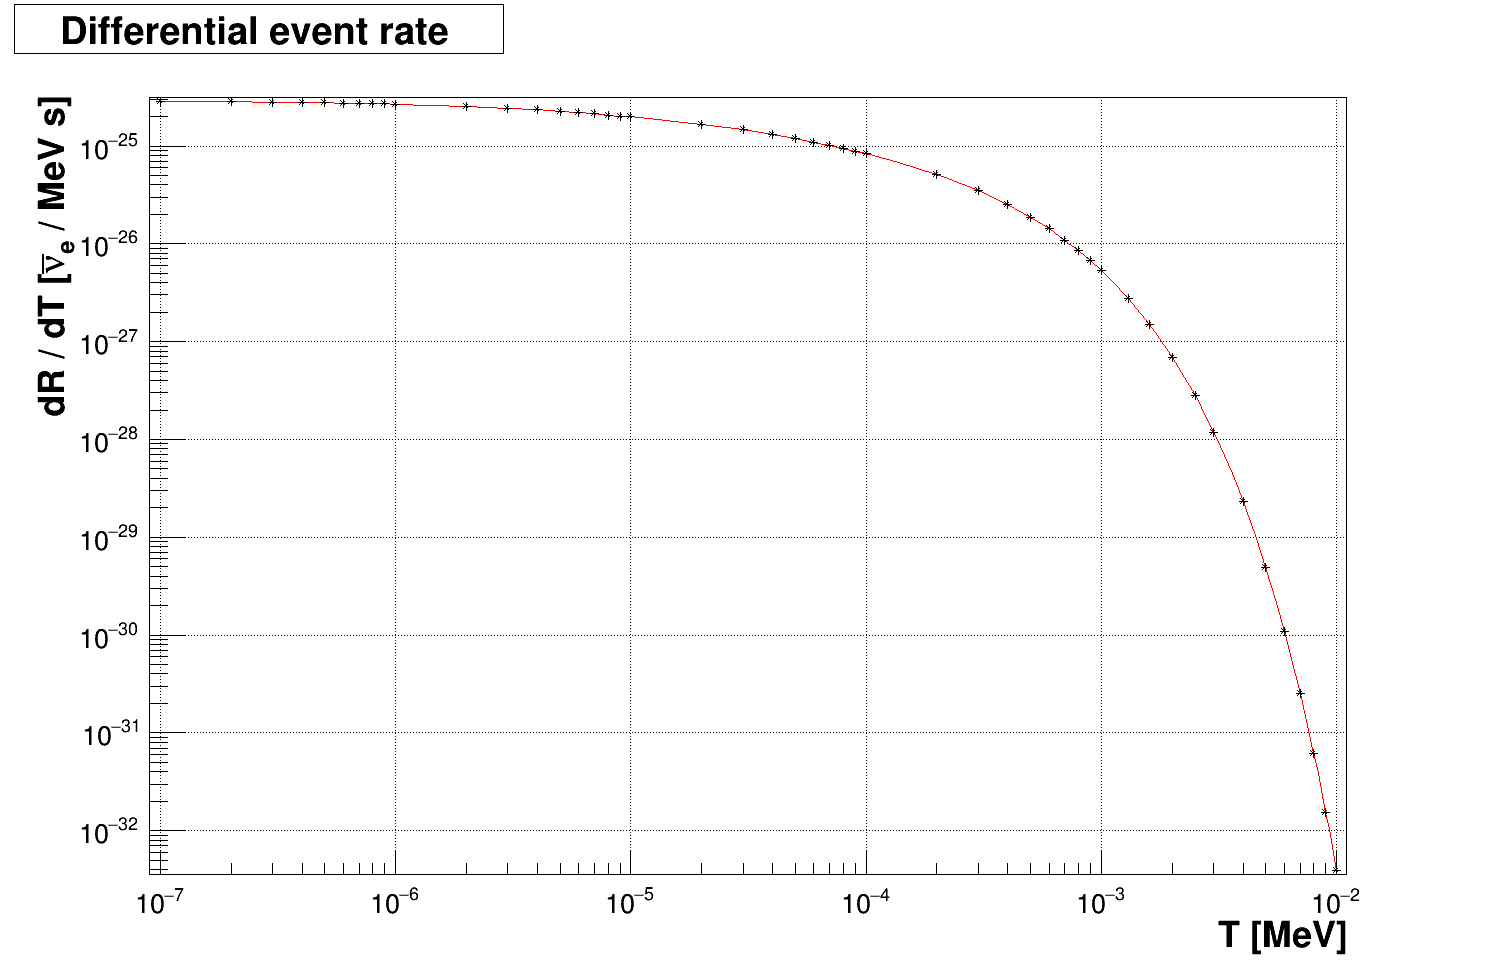

In [30]:
dRate_graph =  TGraph(len(ifddRates), T, ifddRates)
dRate_graph.SetLineColor(2)
dRate_graph.SetTitle('Differential event rate; T [MeV]; dR / dT [#bar{#nu}_{e} / MeV s]')
dRate_graph.GetXaxis().SetTitleOffset(1.4)
dRate_graph.GetXaxis().SetTitleOffset(1.0)

dRate_graph.GetXaxis().SetLabelFont(42)  # Tipo de letra 42 (Helvetica)
dRate_graph.GetXaxis().SetLabelSize(0.03)  # Tamaño de la fuente para las etiquetas del eje X

dRate_graph.GetYaxis().SetLabelFont(42)
dRate_graph.GetYaxis().SetLabelSize(0.03)  # Tamaño de la fuente para las etiquetas del eje Y

c1 = TCanvas( 'c1', '', 300, 500, 1500, 1000 ) #(puntos en x,puntos en y, size (X,y))

#c1.SetFillColor( 42 )
c1.SetGrid()
#---------Style-----------
gROOT.SetStyle("Plain")
gStyle.SetOptStat(0)
#gPad.SetLogy(1)  #set the canvas in a log mode in y
#---------Style-----------
c1.SetLogy()
c1.SetLogx()

dRate_graph.Draw('*ACP')
c1.Draw()
# c1.Print('DifferentialEventRateLV.pdf')

In [20]:

def quenching(x, par):
    T = x[0]
    A = par[0]

    k   =  0.133 * math.pow(Z, 2/3) / (math.sqrt(A))
    epsilon   = 11.5 * T * math.pow(Z, (-7/3))
    # epsilon   = 11.5 * math.pow(T, (-7/3))
    g_epsilon = 3*math.pow(epsilon, 0.15) + 0.7*math.pow(epsilon, 0.6) + epsilon

    quenchfact = k*g_epsilon / (1 + k*g_epsilon)

    return quenchfact

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


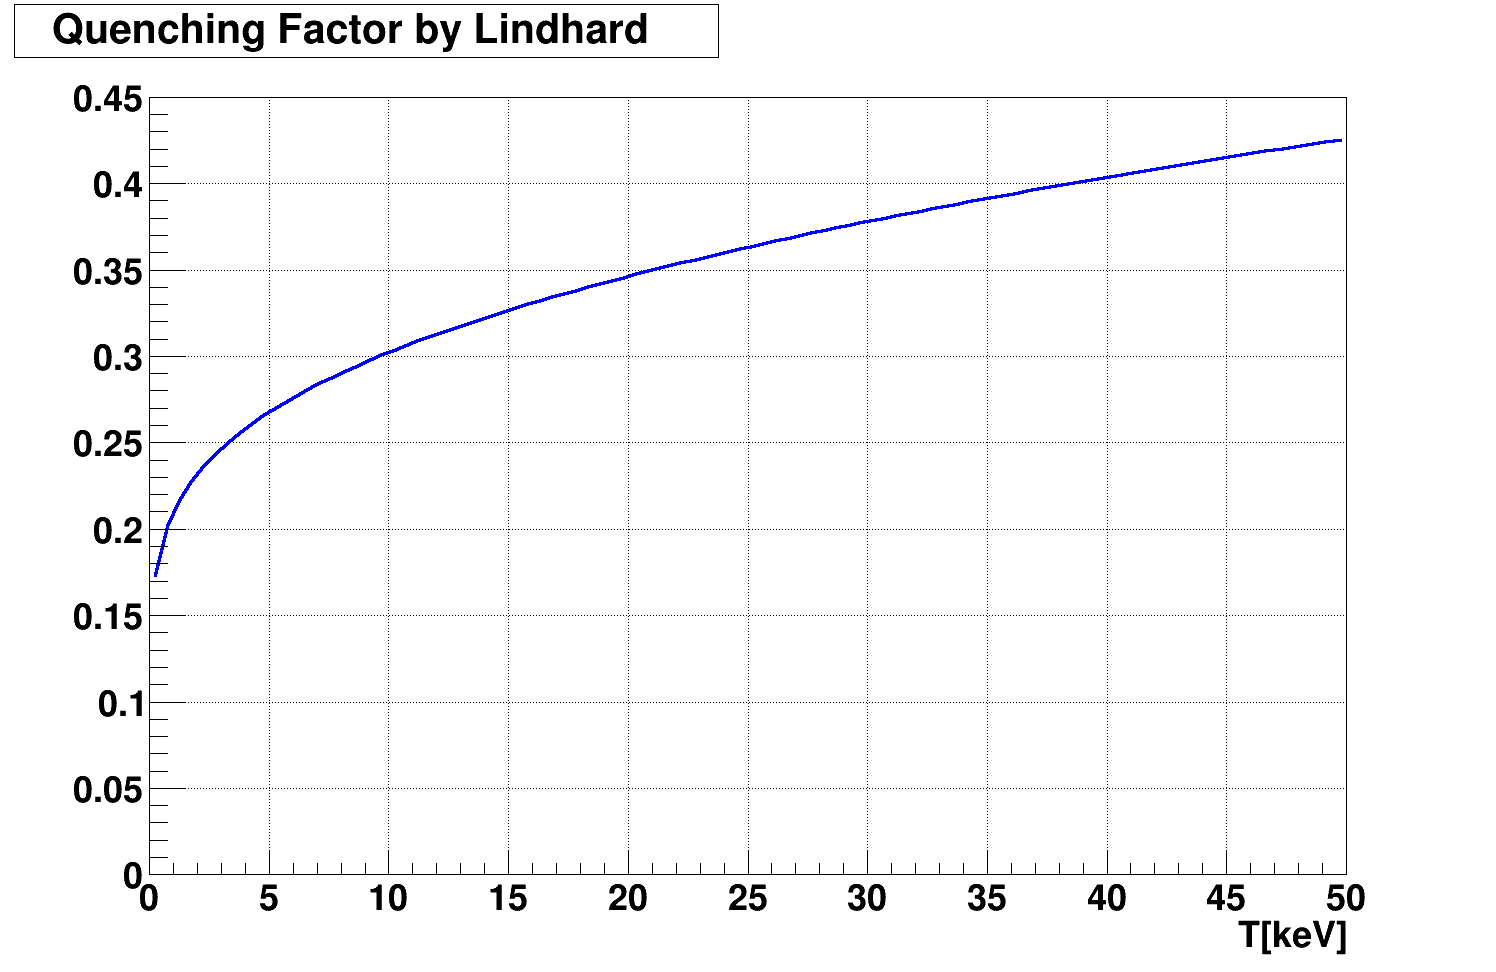

In [21]:
Quench = TF1('Quench', quenching, 0, 50, 1)
Quench.SetParameter(0, Si_amu)

Quench.SetLineColor(4)
Quench.GetYaxis().SetRangeUser(0,0.45)
Quench.SetTitle('Quenching Factor by Lindhard ; T[keV]')
Quench.SetMinimum(0)

c1 = TCanvas( 'c1', '', 300, 500, 1500, 1000 ) #(puntos en x,puntos en y, size (X,y))

#c1.SetFillColor( 42 )
c1.SetGrid()
#---------Style-----------
gROOT.SetStyle("Plain")
gStyle.SetOptStat(0)
#gPad.SetLogy(1)  #set the canvas in a log mode in y
#---------Style-----------

Quench.Draw()
c1.Draw()
# c1.Print('QuenchingFactorLinSi.pdf')

In [22]:
def diffquenching(x, par):
    T = x[0]
    A = par[0]

    k   = (0.133 * math.pow(Z, 2/3)) / (math.sqrt(A))

    epsilon    = 11.5 * T * math.pow(Z, (-7/3))
    # epsilon   = 11.5 * math.pow(T, (-7/3))
    
    g_epsilon  = 3*math.pow(epsilon, 0.15) + 0.7*math.pow(epsilon, 0.6) + epsilon
    dg_epsilon = 0.45*math.pow(epsilon, -0.85) + 0.42*math.pow(epsilon, -0.4) + 1


    diffquenchfact = ((k * math.pow(dg_epsilon, 1)) / (math.pow((1 + (k*g_epsilon)), 2))) * (11.5 * math.pow(Z, -7/3))

    # diffquenchfact = k * ((dg_epsilon))

    return diffquenchfact
    

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


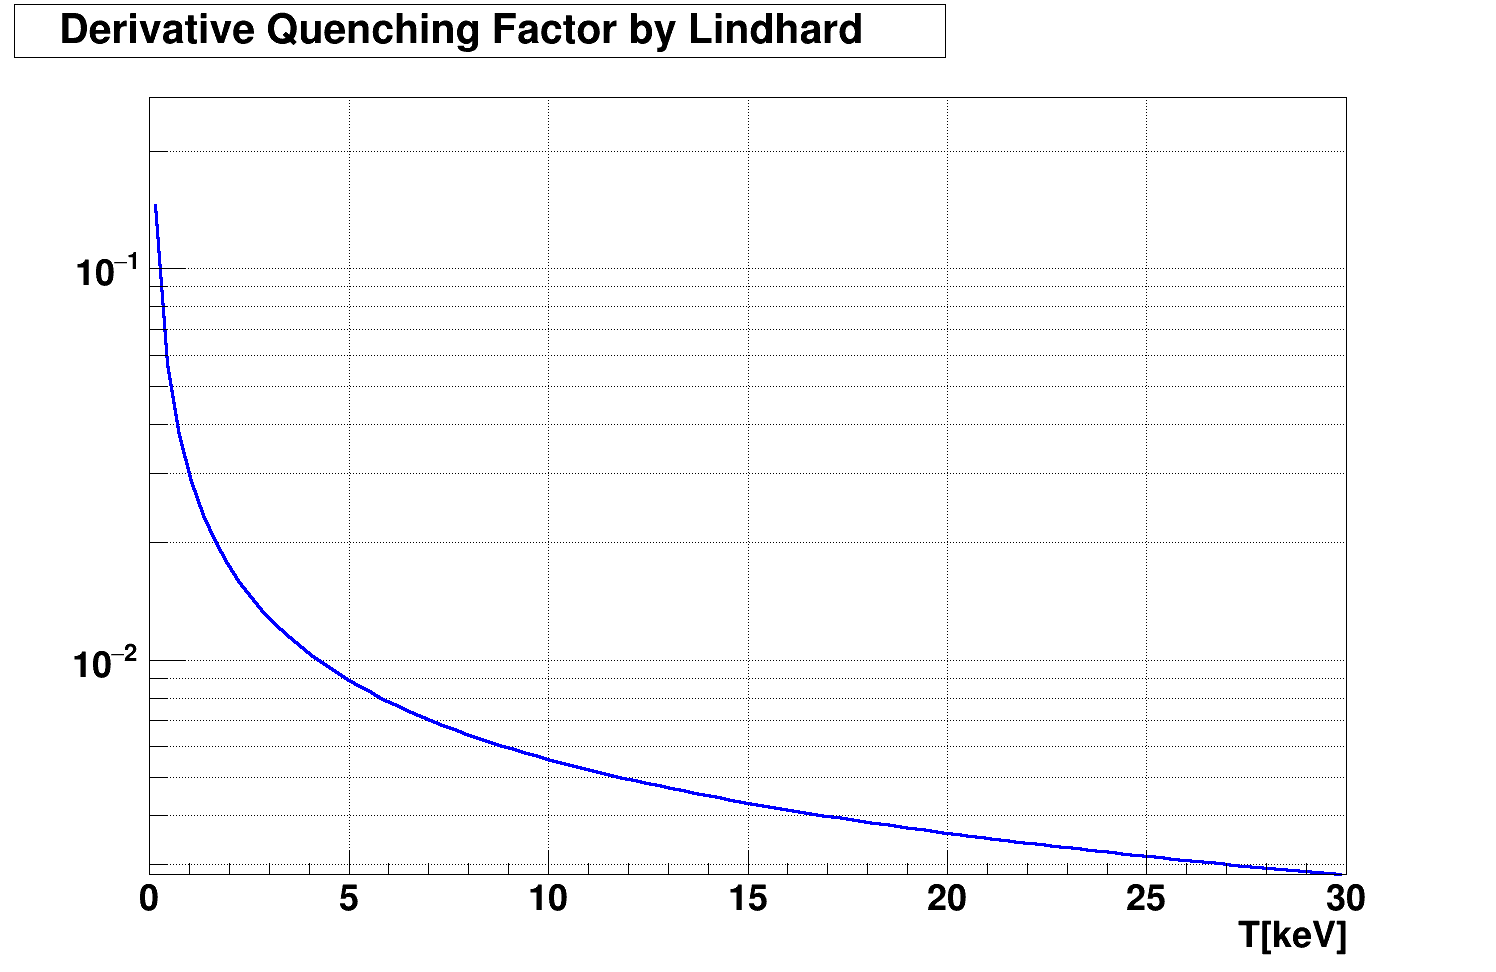

In [27]:
deQuench = TF1('deQuench', diffquenching, 0, 30, 1)
deQuench.SetParameter(0, Si_amu)
deQuench.SetLineColor(4)

deQuench.SetTitle('Derivative Quenching Factor by Lindhard ; T[keV]')

c1 = TCanvas( 'c1', '', 300, 500, 1500, 1000 ) #(puntos en x,puntos en y, size (X,y))

#c1.SetFillColor( 42 )
c1.SetGrid()
#---------Style-----------
gROOT.SetStyle("Plain")
gStyle.SetOptStat(0)
#gPad.SetLogy(1)  #set the canvas in a log mode in y
#---------Style-----------

c1.SetLogy()

deQuench.Draw()
c1.Draw()
# c1.Print('DerivativeQuenchingFactorLinSi.pdf')

<class 'array.array'>
array('d', [1.0986023402057836e-32, 4.4040869546617757e-32, 1.8059171402182958e-31, 7.640211318722329e-31, 3.361394758294799e-30, 1.553866506273656e-29, 7.66797773673862e-29, 4.152470114893125e-28, 1.0161220774094517e-27, 2.6103244709646516e-27, 5.831201664736744e-27, 1.1097139981491679e-26, 2.2214295434942217e-26, 2.8431198408336305e-26, 3.6755887467179333e-26, 4.8101268816759415e-26, 6.391192628392747e-26, 8.659845654863187e-26, 1.204875534015129e-25, 1.742184236646526e-25, 2.6870620460909577e-25, 4.778966489080376e-25, 5.154875797966281e-25, 5.598936338508367e-25, 6.130701883268396e-25, 6.775322161318318e-25, 7.57197354289116e-25, 8.588927200537154e-25, 9.953650214735777e-25, 1.1950021594057889e-24, 1.553847796639725e-24, 1.6115888442402125e-24, 1.6770382587747328e-24, 1.7522192564096504e-24, 1.8402223799381065e-24, 1.945701934974314e-24, 2.076132442192781e-24, 2.2447396805259933e-24, 2.4809802727631347e-24, 2.877222546768433e-24, 2.9370948257934637e-24, 3.0040

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


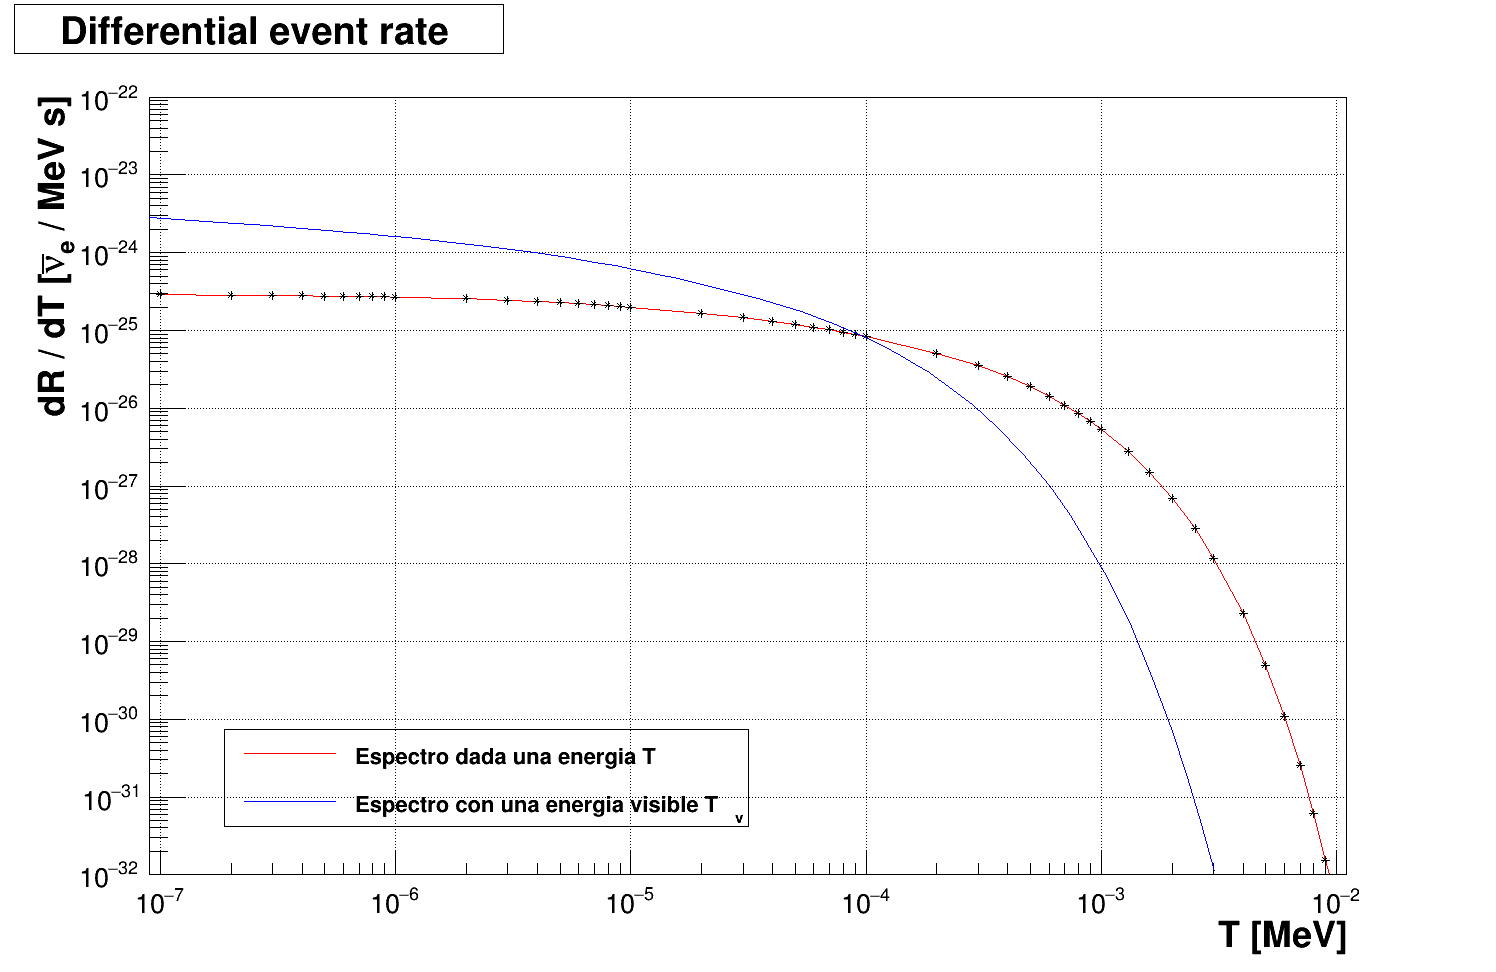

In [35]:
T_v = array('d')                                # Visible energy in MeV
ifddRate_v = array('d')

Quench = TF1('Quench', quenching, 0, 50, 1)     # Function in keV  
Quench.SetParameter(0, Si_amu)

deQuench = TF1('deQuench', diffquenching, 0, 30, 1) # Function in keV  
deQuench.SetParameter(0, Si_amu)

for item in T:
    T_v.append(item*Quench.Eval(item*1e3))

print(type(ifddRates)) 

for i in range(len(ifddRates)):
    ifddRate_v.append(math.pow((Quench.Eval(T[i]*1e3) + (T[i]*1e3) * (deQuench.Eval(T[i]*1e3))), -1) * ifddRates[i])

print(ifddRate_v)


dRatev_graph =  TGraph(len(ifddRate_v), T_v, ifddRate_v)
dRatev_graph.SetLineColor(4)
dRatev_graph.SetTitle('Differential event rate; T [MeV]; dR / dT [#bar{#nu}_{e} / MeV s]')
dRatev_graph.GetXaxis().SetTitleOffset(1.4)
dRatev_graph.GetXaxis().SetTitleOffset(1.0)

dRatev_graph.GetXaxis().SetLabelFont(42)  # Tipo de letra 42 (Helvetica)
dRatev_graph.GetXaxis().SetLabelSize(0.03)  # Tamaño de la fuente para las etiquetas del eje X

dRatev_graph.GetYaxis().SetLabelFont(42)
dRatev_graph.GetYaxis().SetLabelSize(0.03)  # Tamaño de la fuente para las etiquetas del eje Y

dRate_graph.GetYaxis().SetRangeUser(10e-33, 10e-23)
# dRate_graph.GetXaxis().SetRangeUser(10e-10, 10e-1)

c1 = TCanvas( 'c1', '', 300, 500, 1500, 1000 ) #(puntos en x,puntos en y, size (X,y))

#c1.SetFillColor( 42 )
c1.SetGrid()
#---------Style-----------
gROOT.SetStyle("Plain")
gStyle.SetOptStat(0)
#gPad.SetLogy(1)  #set the canvas in a log mode in y
#---------Style-----------
c1.SetLogy()
c1.SetLogx()

name = 'Energia de Retroceso visible T_{v}'

#-----Se crean las leyendas que a parecen en el Canvas ---
leg = TLegend(0.15,0.15,0.50,0.25)
leg.SetFillStyle(0)
leg.SetBorderSize(1)
leg.SetTextSize(0.025)
leg.AddEntry(dRate_graph , 'Espectro dada una energia T', 'l')
leg.AddEntry(dRatev_graph, 'Espectro con una energia visible T_{v}', 'l')


dRate_graph.Draw()
dRatev_graph.Draw('same')
# dRate_graph.Draw('same')


leg.Draw()
c1.Draw()
# c1.Print('ComparissondRateQuenching.pdf')

In [36]:
def dRate(x, par):
    
    T_t = x[0]
    Tt_min = par[0]
    Tt_max = par[1]

    dRate_graph =  TGraph(len(ifddRates), T, ifddRates)

    
    if T_t < Tt_min:
        result = 0
    elif T_t > Tt_max:
        result = 0
    else:
        result = dRate_graph.Eval(T_t)
    
    return result 

In [37]:
dRate_TF1 = TF1('dRate_TF1', dRate, min(T), max(T), 2)

dRate_TF1.SetParameter(0, min(T))
dRate_TF1.SetParameter(1, max(T))
dRate_TF1.SetNpx(1000)

#------------------------ Compute the integral ----------------------------------------------

ns = 10000 

x = array('d', [0.0] * ns) 
w = array('d', [0.0] * ns) 


dRate_TF1.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
ifdRate_TF1 = dRate_TF1.IntegralFast(ns, x, w, min(T), max(T))

#--------------------------------------------------------------------------------------------

print(ifdRate_TF1)

3.7507240753362735e-29


In [107]:
def dRate_V(x, par):
    
    Tv = x[0]*1e-3
    Tv_min = par[0]
    Tv_max = par[1]

    dRatev_graph =  TGraph(len(ifddRate_v), T_v, ifddRate_v)

    result = dRatev_graph.Eval(Tv)

    # if Tv < Tv_min:
    #     result = 0
    # elif Tv > Tv_max:
    #     result = 0
    # else:
    #     result = dRatev_graph.Eval(Tv)
    
    return result*1e-3   

4.802073431511384e-30


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file DifferentialRateVisibleEnergy.pdf has been created


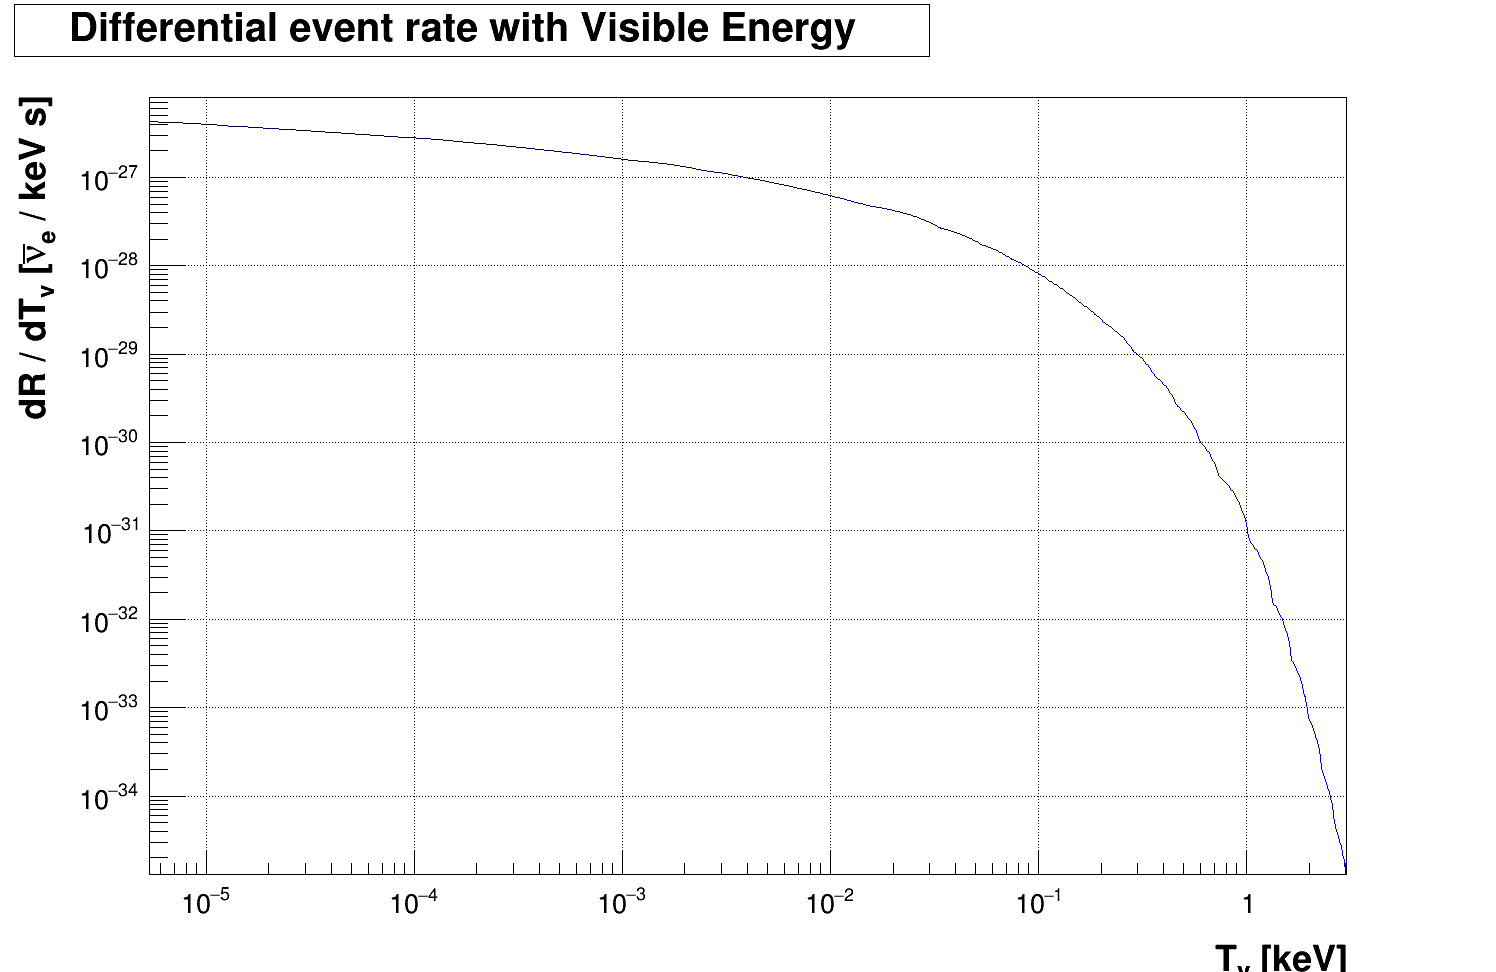

In [117]:
dRatev_TF1 = TF1('dRatev_TF1', dRate_V, min(T_v)*1e3*0.9, max(T_v)*1e3, 2)

dRatev_TF1.SetParameter(0, min(T_v))
dRatev_TF1.SetParameter(1, max(T_v))
dRatev_TF1.SetNpx(1000)

#------------------------ Compute the integral ----------------------------------------------

ns = 10000 

x = array('d', [0.0] * ns) 
w = array('d', [0.0] * ns) 


dRatev_TF1.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
ifdRatev_TF1 = dRatev_TF1.IntegralFast(ns, x, w, min(T_v), max(T_v))

#--------------------------------------------------------------------------------------------

dRatev_TF1.SetLineWidth(1)
dRatev_TF1.SetLineColor(4)
dRatev_TF1.SetTitle('Differential event rate with Visible Energy; T_{v} [keV]; dR / dT_{v} [#bar{#nu}_{e} / keV s]')
dRatev_TF1.GetXaxis().SetTitleOffset(1.4)
dRatev_TF1.GetYaxis().SetTitleOffset(1.2)

dRatev_TF1.GetXaxis().SetLabelFont(42)  # Tipo de letra 42 (Helvetica)
dRatev_TF1.GetXaxis().SetLabelSize(0.03)  # Tamaño de la fuente para las etiquetas del eje X

dRatev_TF1.GetYaxis().SetLabelFont(42)
dRatev_TF1.GetYaxis().SetLabelSize(0.03)  # Tamaño de la fuente para las etiquetas del eje Y

c1 = TCanvas( 'c1', '', 300, 500, 1500, 1000 ) #(puntos en x,puntos en y, size (X,y))

#c1.SetFillColor( 42 )
c1.SetGrid()
#---------Style-----------
gROOT.SetStyle("Plain")
gStyle.SetOptStat(0)
#gPad.SetLogy(1)  #set the canvas in a log mode in y
#---------Style-----------
c1.SetLogy()
c1.SetLogx()

dRatev_TF1.Draw('CP')
c1.Draw()
c1.Print('DifferentialRateVisibleEnergy.pdf')

print(ifdRatev_TF1)

In [29]:
t_v = 0.00045

sigma_Tv = TF1('sigma_Tv', '[0] * TMath::Sqrt([1]*x*1e6)', min(T_v), max(T_v), 2)

sigma_Tv.SetParameter(0, 0.05)
sigma_Tv.SetParameter(1,  3.6)

sigma_s = math.pow(sigma_Tv.Eval(t_v)*1e-6, 1)

fGauss_Conv = TF1("fGauss_Conv","(1/sqrt(2*3.14159*[0]^2)*exp(-0.5*((x-[1])/[0])^2))", min(T_v), max(T_v), 2)
fGauss_Conv.SetParameter(0, sigma_s)
fGauss_Conv.SetParameter(1, t_v)





In [118]:
def dRateGauss (x, par):

    T_vprime = par[0]
    eval_Tv = x[0]

    fGauss_Conv = TF1('fGauss_Conv', '(1/sqrt(2*3.14159*(([0] * TMath::Sqrt([1]*x*1e6))*1e-6)^2)*exp(-0.5*(([2]-x)/(([0] * TMath::Sqrt([1]*x*1e6))*1e-6))^2))', 0 , 10e-1, 3)
    fGauss_Conv.SetParameter(0, 0.05)             #This values are following the sigma dependent of Tv 
    fGauss_Conv.SetParameter(1, 3.6)              
    fGauss_Conv.SetParameter(2, T_vprime)

    dRatev_TF1 = TF1('dRatev_TF1', dRate_V, min(T_v), max(T_v), 2)

    dRatev_TF1.SetParameter(0, min(T_v))
    dRatev_TF1.SetParameter(1, max(T_v))
    dRatev_TF1.SetNpx(1000)

    result = fGauss_Conv.Eval(eval_Tv) * dRatev_TF1.Eval(eval_Tv)

    return result




In [111]:
min(T_v)*1e3

5.934008281121903e-06

4.2368533706522646e-27


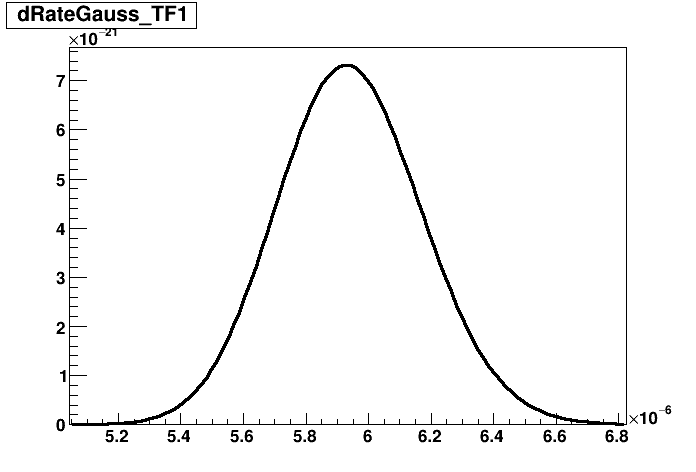

In [115]:
x_proof = min(T_v)*1e3
xmin_proof = x_proof*0.85
xmax_proof = x_proof*1.15

dRateGauss_TF1 = TF1('dRateGauss_TF1', dRateGauss, xmin_proof, xmax_proof, 1)
dRateGauss_TF1.SetParameter(0, x_proof)

ns = 10000 

x = array('d', [0.0] * ns) 
w = array('d', [0.0] * ns) 


dRateGauss_TF1.CalcGaussLegendreSamplingPoints(ns, x, w)
ifdRateGauss_TF1 = dRateGauss_TF1.IntegralFast(ns, x, w, xmin_proof, xmax_proof)

c1 = TCanvas()
c1.Draw()
# c1.SetLogx()

dRateGauss_TF1.Draw()

print(ifdRateGauss_TF1)

In [119]:
def dRateGaussTv_prime (x, par):
    
    eval_Tv_prime = x[0]
    p0 = par[0]

    min_T_v = eval_Tv_prime*0.85
    max_T_v = eval_Tv_prime*1.15

    dRateGauss_TF1 = TF1('dRateGauss_TF1', dRateGauss, min_T_v, max_T_v, 1)
    dRateGauss_TF1.SetParameter(0, eval_Tv_prime)

    ns = 10000 

    x = array('d', [0.0] * ns) 
    w = array('d', [0.0] * ns) 


    dRateGauss_TF1.CalcGaussLegendreSamplingPoints(ns, x, w)
    ifdRateGauss_TF1 = dRateGauss_TF1.IntegralFast(ns, x, w, min_T_v, max_T_v)

    return ifdRateGauss_TF1

In [120]:
print(dRatev_TF1.Eval(6e-6), dRateGaussTv_prime([6e-6], [0]))

4.234222485235373e-27 4.232948399841822e-27


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


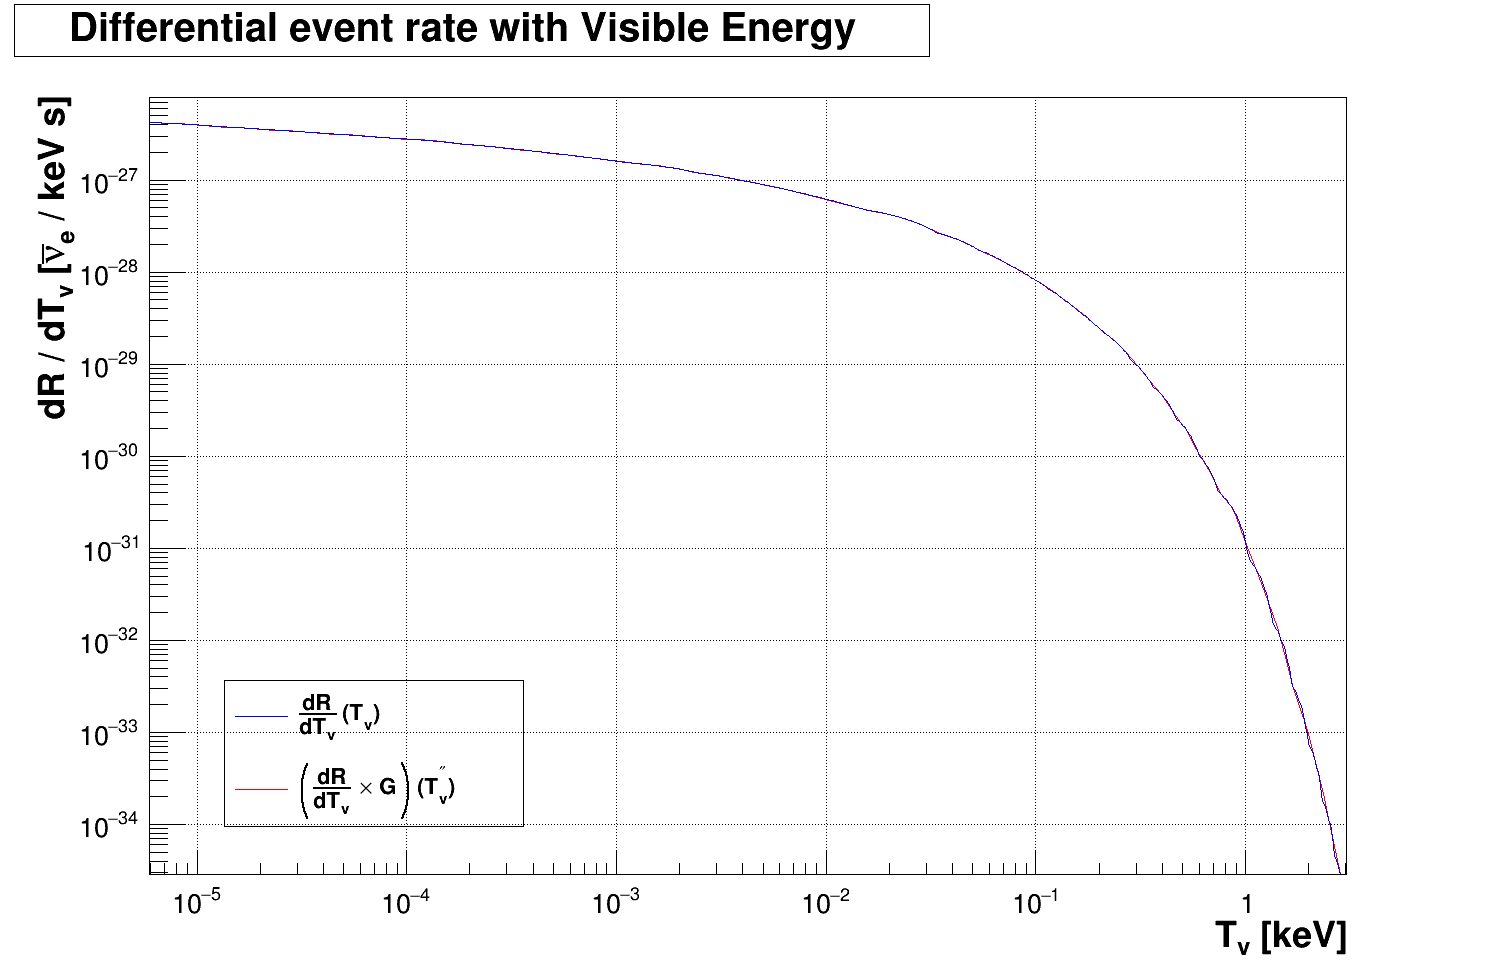

In [121]:
# dRateGaussTv_prime_TF1 = TF1('dRateGaussTv_prime_TF1', dRateGaussTv_prime, min(T_v), max(T_v), 1)
dRateGaussTv_prime_TF1 = TF1('dRateGaussTv_prime_TF1', dRateGaussTv_prime, min(T_v)*1e3, max(T_v)*1e3, 1)
dRateGaussTv_prime_TF1.SetNpx(100)
dRateGaussTv_prime_TF1.SetLineWidth(1)
dRateGaussTv_prime_TF1.SetLineColor(2)

dRateGaussTv_prime_TF1.SetTitle('Differential event rate with Visible Energy; T_{v} [keV]; dR / dT_{v} [#bar{#nu}_{e} / keV s]')
dRateGaussTv_prime_TF1.GetXaxis().SetTitleOffset(1.4)
dRateGaussTv_prime_TF1.GetXaxis().SetTitleOffset(1.0)

dRateGaussTv_prime_TF1.GetXaxis().SetLabelFont(42)  # Tipo de letra 42 (Helvetica)
dRateGaussTv_prime_TF1.GetXaxis().SetLabelSize(0.03)  # Tamaño de la fuente para las etiquetas del eje X

dRateGaussTv_prime_TF1.GetYaxis().SetLabelFont(42)
dRateGaussTv_prime_TF1.GetYaxis().SetLabelSize(0.03)  # Tamaño de la fuente para las etiquetas del eje Y

# dRateGaussTv_prime_TF1.GetXaxis().SetRangeUser(60e-10, 10e-3)

#-----Se crean las leyendas que a parecen en el Canvas ---
leg = TLegend(0.15,0.15,0.35,0.30)
leg.SetFillStyle(0)
leg.SetBorderSize(1)
leg.SetTextSize(0.025)
leg.AddEntry(dRatev_TF1 , '#frac{dR}{dT_{v}} (T_{v})', 'l')
leg.AddEntry(dRateGaussTv_prime_TF1, '#left(#frac{dR}{dT_{v}} #times G#right) (T_{v}^{#doublequote})', 'l')

c1 = TCanvas( 'c1', '', 300, 500, 1500, 1000 ) #(puntos en x,puntos en y, size (X,y))

#c1.SetFillColor( 42 )
c1.SetGrid()
#---------Style-----------
gROOT.SetStyle("Plain")
gStyle.SetOptStat(0)
#gPad.SetLogy(1)  #set the canvas in a log mode in y
#---------Style-----------
c1.SetLogx()
c1.SetLogy()

# dRatev_TF1.Draw('C')
dRateGaussTv_prime_TF1.Draw('C')
dRatev_TF1.Draw('same')
c1.Draw()
leg.Draw()

# c1.Print('DifferentialRateConvolution.pdf')

In [122]:
def skipper_eff(x, par):
    
    e = x[0]
    p0 = par[0]   # epsilon sat
    p1 = par[1]   # epsilon gamma [eV]
    p2 = par[2]   # epsilon delta 
    p3 = par[3]   # epsilon sigma [eV]
    p4 = par[4]   # epsilon 0 [eV]
    p5 = par[5]   # minimum energy efficiency
    p6 = par[6]   # maximum energy efficiency

    Skipper_eff_TF1 = TF1('Skipper_eff_TF1', '([0] + [1]*exp(-x/[2])) * ((0.5 * TMath::TanH((x-[3])/[4]))+ 0.5)^10', p5, p6, 5)

    Skipper_eff_TF1.SetParameter(0, p0)
    Skipper_eff_TF1.SetParameter(1, p1)
    Skipper_eff_TF1.SetParameter(2, p2) 
    Skipper_eff_TF1.SetParameter(3, p3)
    Skipper_eff_TF1.SetParameter(4, p4)

    if e < p5:
        result = 0
    else:
        result = Skipper_eff_TF1.Eval(e)
    
    return result

0.08180284414633375
 FCN=50.7788 FROM MIGRAD    STATUS=CONVERGED     541 CALLS         542 TOTAL
                     EDM=3.05544e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           7.57829e-01   1.09859e-02   1.41340e-05  -1.49103e-02
   2  p1          -2.21589e-01   7.00767e-02   4.74537e-05   5.76122e-03
   3  p2           1.84849e+02   6.97604e+01   4.94407e-02  -1.46262e-05
   4  p3          -3.70651e+01   1.45692e+01   6.83912e-03   1.59998e-04
   5  p4           4.70463e+01   1.23150e+01   4.42085e-03   2.55304e-04
 FCN=50.7788 FROM MIGRAD    STATUS=CONVERGED      65 CALLS          66 TOTAL
                     EDM=2.12283e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0     

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file EfficiencySkipperCONNIE2019.pdf has been created


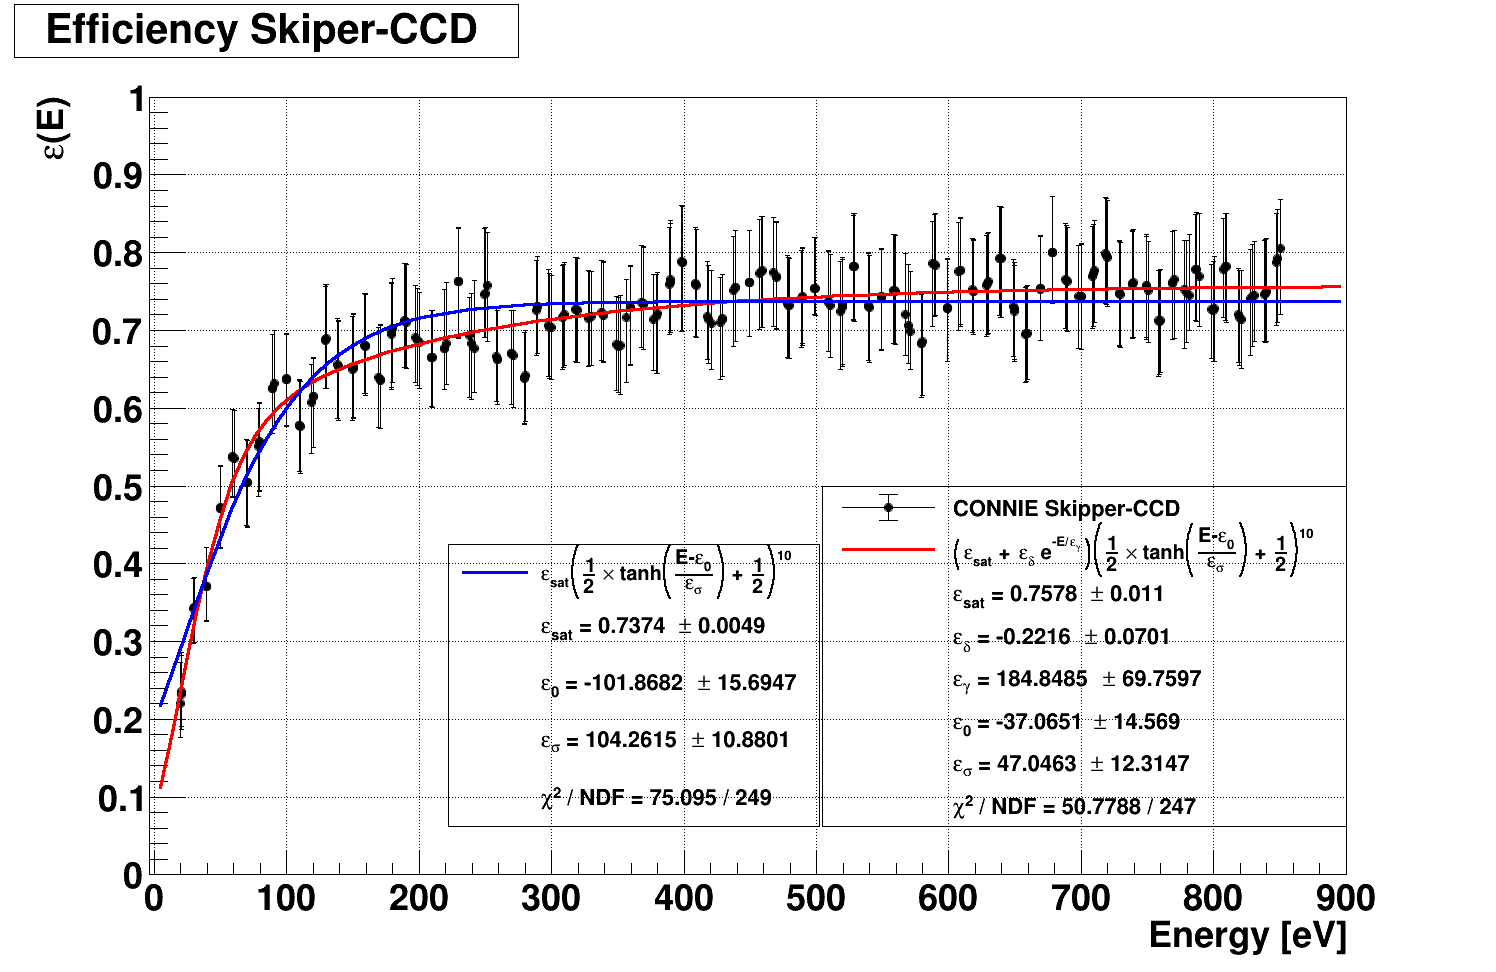

In [123]:
c1 = TCanvas( 'c1', '', 300, 500, 1500, 1000 ) #(puntos en x,puntos en y, size (X,y))

c1.SetGrid()
#---------Style-----------
gROOT.SetStyle("Plain")
gStyle.SetOptStat(0)
#---------Style-----------

# Skipper_eff = pd.read_csv('CONNIE_Skipper_Eff.csv', sep=',').to_numpy()

# SkipEff_gra = TGraph()

# nline = 0

# for line in Skipper_eff:
#     SkipEff_gra.SetPoint(nline, line[0]*1e3, line[1])
#     nline = nline + 1

Skipper_eff = pd.read_csv('CONNIE_Skipper_Eff_Uncertenties.csv', sep=',').to_numpy()

SkipEff_gra = TGraphAsymmErrors()

nline = 0

for line in Skipper_eff:
    SkipEff_gra.SetPoint(nline, line[0]*1e3, line[1])
    SkipEff_gra.SetPointEYhigh(nline, line[2]-line[1])
    SkipEff_gra.SetPointEYlow(nline, line[1]-line[3])
    nline = nline + 1


# e_min = float(min(Skipper_eff[0])) * 1e3
e_min = 0

Skipper_eff_TF1 = TF1('Skipper_eff_TF1', '([0] + [1]*exp(-x/[2])) * ((0.5 * TMath::TanH((x-[3])/[4]))+ 0.5)^10', e_min, 1000, 5)

Skipper_eff2_TF1 =  TF1('Skipper_eff2_TF1', '[0] * ((0.5 * TMath::TanH((x-[1])/[2]))+ 0.5)^10', 0, 1000, 3)

#----------------- Using Parameters for CCD-2 CONNIE Data ------------

Skipper_eff_TF1.SetParameter(0, 0.662)            # 0.662  
Skipper_eff_TF1.SetParameter(1, 0.083)            # 0.083
Skipper_eff_TF1.SetParameter(2, 303)              # 303
Skipper_eff_TF1.SetParameter(3, -32.9)            # -32.9
Skipper_eff_TF1.SetParameter(4, 54.3)             # 54.3

# Skipper_eff2_TF1.SetParameter(0, 0.878)
# Skipper_eff2_TF1.SetParameter(1, 9.50)
# Skipper_eff2_TF1.SetParameter(2, 53.2)

#----------------------------------------------------------------------

SkipEff_gra.Fit(Skipper_eff_TF1, 'R')


p0 = Skipper_eff_TF1.GetParameter(0)
p1 = Skipper_eff_TF1.GetParameter(1)
p2 = Skipper_eff_TF1.GetParameter(2)
p3 = Skipper_eff_TF1.GetParameter(3)
p4 = Skipper_eff_TF1.GetParameter(4)

Skipper_eff_TF1.SetParameter(0, p0)
Skipper_eff_TF1.SetParameter(1, p1)
Skipper_eff_TF1.SetParameter(2, p2) 
Skipper_eff_TF1.SetParameter(3, p3)
Skipper_eff_TF1.SetParameter(4, p4)

SkipEff_gra.Fit(Skipper_eff_TF1, 'R')

Skipper_eff2_TF1.SetParameter(0, p0)
Skipper_eff2_TF1.SetParameter(1, p3)
Skipper_eff2_TF1.SetParameter(2, p4)

SkipEff_gra.Fit(Skipper_eff2_TF1,'R')


Skipper_Eff = TF1('Skipper_Eff', skipper_eff, 0, 1500, 7)
Skipper_Eff.SetParameter(0, p0)
Skipper_Eff.SetParameter(1, p1)
Skipper_Eff.SetParameter(2, p2)
Skipper_Eff.SetParameter(3, p3)
Skipper_Eff.SetParameter(4, p4)
Skipper_Eff.SetParameter(5, e_min)
Skipper_Eff.SetParameter(6, 1000)

SkipEff_gra.SetMinimum(0)
SkipEff_gra.SetLineColor(1)
SkipEff_gra.SetMarkerStyle(8)


Skipper_eff_TF1.SetLineWidth(1)
Skipper_eff_TF1.SetLineColor(0)

SkipEff_gra.SetTitle('Efficiency Skiper-CCD; Energy [eV]; #varepsilon(E)')
SkipEff_gra.GetYaxis().SetRangeUser(0,1)
SkipEff_gra.GetXaxis().SetRangeUser(-10,900)

Skipper_Eff.SetLineColor(2)
# Skipper_Eff.SetLineWidth(1)
Skipper_eff2_TF1.SetLineColor(4)


name_Feff = '#scale[0.9]{#left(#varepsilon_{sat} + #varepsilon_{#delta} e^{-E/#varepsilon_{#gamma}}#right)#left(#frac{1}{2} #times tanh#left(#frac{E-#varepsilon_{0}}{#varepsilon_{#sigma}}#right) + #frac{1}{2}#right)^{10}}'
p0_n = '#varepsilon_{sat} = ' + str(round(Skipper_Eff.GetParameter(0), 4)) + ' #pm ' + str(round(Skipper_eff_TF1.GetParError(0), 4))
p1_n = '#varepsilon_{#delta} = ' + str(round(Skipper_Eff.GetParameter(1), 4)) + ' #pm ' + str(round(Skipper_eff_TF1.GetParError(1), 4)) 
p2_n = '#varepsilon_{#gamma} = ' + str(round(Skipper_Eff.GetParameter(2), 4)) + ' #pm ' + str(round(Skipper_eff_TF1.GetParError(2), 4)) 
p3_n = '#varepsilon_{0} = ' + str(round(Skipper_Eff.GetParameter(3), 4)) + ' #pm ' + str(round(Skipper_eff_TF1.GetParError(3), 4)) 
p4_n = '#varepsilon_{#sigma} = ' + str(round(Skipper_Eff.GetParameter(4), 4)) + ' #pm ' + str(round(Skipper_eff_TF1.GetParError(4), 4))
Chi2_NDF = '#chi^{2} / NDF = ' + str(round(Skipper_eff_TF1.GetChisquare(), 4))  + ' / ' + str(round(Skipper_eff_TF1.GetNDF(), 4))

name_Feff2 = '#scale[0.9]{#varepsilon_{sat}#left(#frac{1}{2} #times tanh#left(#frac{E-#varepsilon_{0}}{#varepsilon_{#sigma}}#right) + #frac{1}{2}#right)^{10}}'
p0_n2 = '#varepsilon_{sat} = ' + str(round(Skipper_eff2_TF1.GetParameter(0), 4)) + ' #pm ' + str(round(Skipper_eff2_TF1.GetParError(0), 4))
p1_n2 = '#varepsilon_{0} = ' + str(round(Skipper_eff2_TF1.GetParameter(1), 4)) + ' #pm ' + str(round(Skipper_eff2_TF1.GetParError(1), 4)) 
p2_n2 = '#varepsilon_{#sigma} = ' + str(round(Skipper_eff2_TF1.GetParameter(2), 4)) + ' #pm ' + str(round(Skipper_eff2_TF1.GetParError(2), 4))
Chi2_NDF_2 = '#chi^{2} / NDF = ' + str(round(Skipper_eff2_TF1.GetChisquare(), 4))  + ' / ' + str(round(Skipper_eff2_TF1.GetNDF(), 4))  

#-----Se crean las leyendas que a parecen en el Canvas ---
leg = TLegend(0.55,0.15,0.90,0.5)
leg.SetFillStyle(0)
leg.SetBorderSize(1)
leg.SetTextSize(0.025)
leg.AddEntry(SkipEff_gra , 'CONNIE Skipper-CCD', 'lep')
leg.AddEntry(Skipper_Eff, name_Feff, 'l')
leg.AddEntry(0, p0_n, '')
leg.AddEntry(0, p1_n, '')
leg.AddEntry(0, p2_n, '')
leg.AddEntry(0, p3_n, '')
leg.AddEntry(0, p4_n, '')
leg.AddEntry(0, Chi2_NDF, '')

#-----Se crean las leyendas que a parecen en el Canvas ---
leg2 = TLegend(0.30,0.15,0.548,0.44)
leg2.SetFillStyle(0)
leg2.SetBorderSize(1)
leg2.SetTextSize(0.025)
leg2.AddEntry(Skipper_eff2_TF1, name_Feff2, 'l')
leg2.AddEntry(0, p0_n2, '')
leg2.AddEntry(0, p1_n2, '')
leg2.AddEntry(0, p2_n2, '')
leg2.AddEntry(0, Chi2_NDF_2, '')

SkipEff_gra.Draw('ap')
# Skipper_eff_TF1.Draw('same')
Skipper_Eff.Draw('same')
Skipper_eff2_TF1.Draw('same')
c1.Update()


c1.Draw()
leg.Draw()
leg2.Draw()

# c1.Print('EfficiencySkipperCONNIE2019.pdf')

print(Skipper_Eff.Eval(0))

In [124]:
Skipper_Eff.Eval(0.999999) 

0.0

In [96]:
Skipper_Eff.Eval(5.934008281121903e-03) * dRateGaussTv_prime_TF1.Eval(5.934008281121903e-09)

0.127962414137103

In [203]:
def dRateGaussEff(x, par):
    
    tv_prime  = x[0]
    p0_eff = par[0]
    p1_eff = par[1]
    p2_eff = par[2]
    p3_eff = par[3]
    p4_eff = par[4]
    p5_eff = par[5]
    p6_eff = par[6]

    Skipper_Eff = TF1('Skipper_Eff', skipper_eff, 0, 1e10, 7)
    Skipper_Eff.SetParameter(0, p0_eff)
    Skipper_Eff.SetParameter(1, p1_eff)
    Skipper_Eff.SetParameter(2, p2_eff)
    Skipper_Eff.SetParameter(3, p3_eff)
    Skipper_Eff.SetParameter(4, p4_eff)
    Skipper_Eff.SetParameter(5, p5_eff)
    Skipper_Eff.SetParameter(6, 1e10)

    dRateGaussTv_prime_TF1 = TF1('dRateGaussTv_prime_TF1', dRateGaussTv_prime, min(T_v)*1e3, max(T_v)*1e3, 1)
    dRateGaussTv_prime_TF1.SetNpx(100)

    tv_prime_MeV = tv_prime * 1e-3
    tv_prime_eV  = tv_prime * 1e3

    # result = Skipper_Eff.Eval(tv_prime_eV) * dRateGaussTv_prime_TF1.Eval(tv_prime)
    result = Skipper_Eff.Eval(tv_prime_eV) * dRateGaussTv_prime_TF1.Eval(tv_prime) * Nt(1000) * 86400

    return result
    

In [80]:
max(T_v)*1e3

3.0223774355102693

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file DifferentialEventRateCompGaussEff_v2.pdf has been created


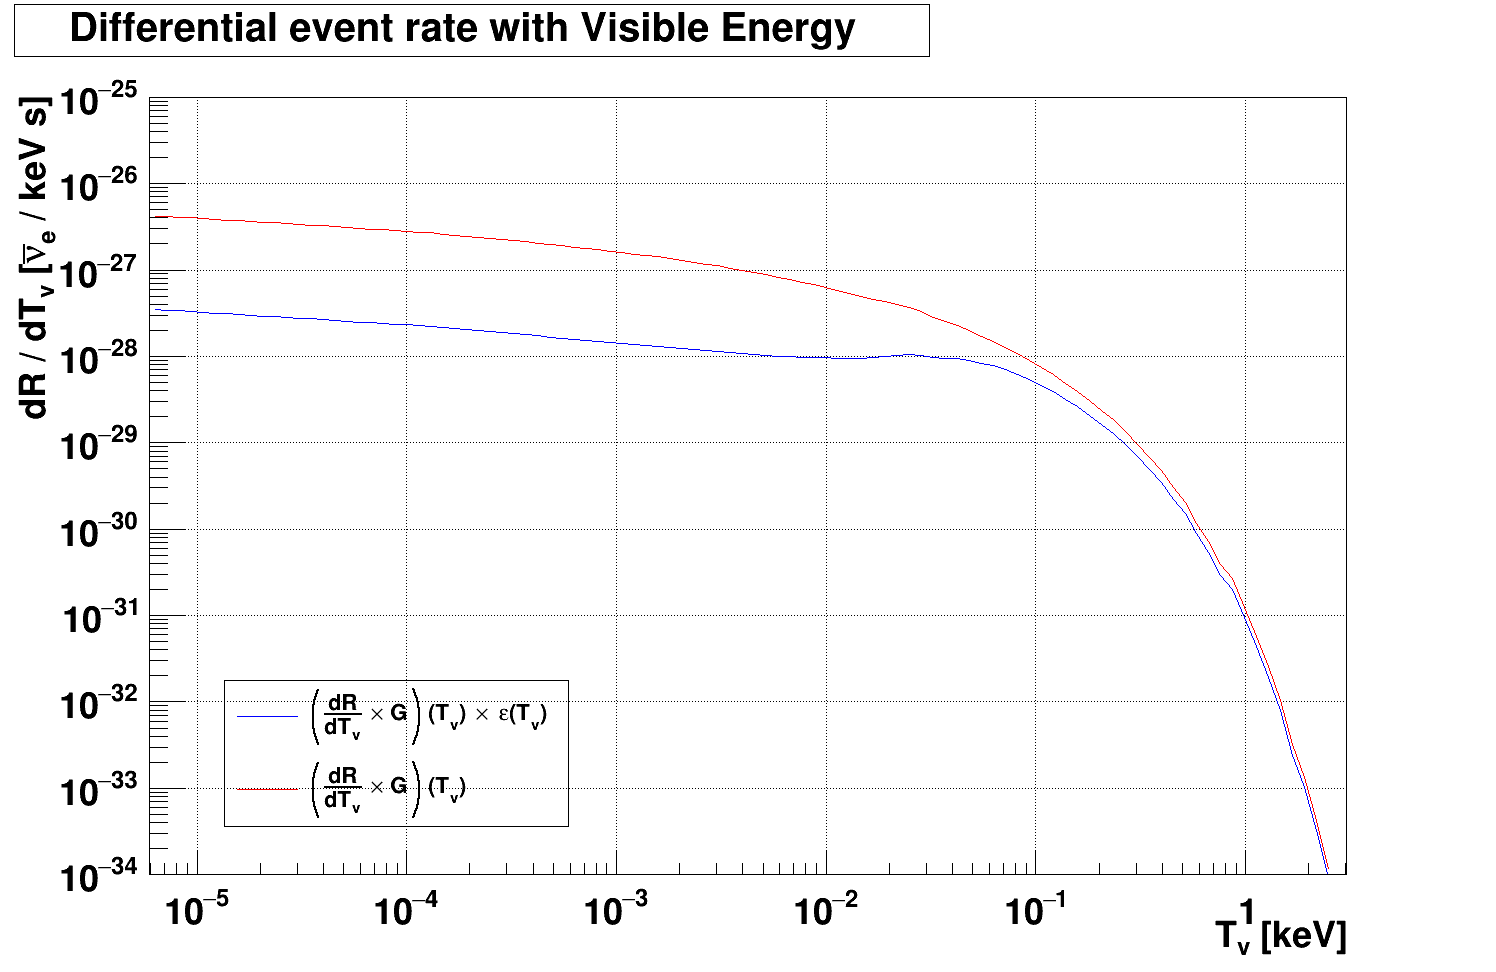

In [128]:
dRateGaussEff_TF1 = TF1('dRateGaussEff_TF1', dRateGaussEff, min(T_v)*1e3, max(T_v)*1e3, 6)
dRateGaussEff_TF1.SetParameter(0, p0)
dRateGaussEff_TF1.SetParameter(1, p1)
dRateGaussEff_TF1.SetParameter(2, p2)
dRateGaussEff_TF1.SetParameter(3, p3)
dRateGaussEff_TF1.SetParameter(4, p4)
dRateGaussEff_TF1.SetParameter(5, 0)

dRateGaussTv_prime_TF1 = TF1('dRateGaussTv_prime_TF1', dRateGaussTv_prime, min(T_v)*1e3, max(T_v)*1e3, 1)
dRateGaussTv_prime_TF1.SetNpx(100)
dRateGaussTv_prime_TF1.SetLineWidth(1)
dRateGaussTv_prime_TF1.SetLineColor(2)
dRateGaussTv_prime_TF1.GetYaxis().SetTitleOffset(1.4)

# dRateGaussTv_prime_TF1.SetTitle('Differential event rate with Visible Energy; T_{v} [keV]; dR / dT_{v} [#bar{#nu}_{e} / keV s]')
dRateGaussEff_TF1.SetTitle('Differential event rate with Visible Energy; T_{v} [keV]; dR / dT_{v} [#bar{#nu}_{e} / keV s]')
dRateGaussEff_TF1.GetYaxis().SetTitleOffset(1.2)
dRateGaussEff_TF1.GetYaxis().SetRangeUser(10e-35, 10e-26)

dRateGaussEff_TF1.SetLineWidth(1)
dRateGaussEff_TF1.SetLineColor(4)

#-----Se crean las leyendas que a parecen en el Canvas ---
leg = TLegend(0.15,0.15,0.38,0.30)
leg.SetFillStyle(0)
leg.SetBorderSize(1)
leg.SetTextSize(0.025)
leg.AddEntry(dRateGaussEff_TF1 , '#left(#frac{dR}{dT_{v}} #times G#right) (T_{v}) #times #varepsilon(T_{v})', 'l')
leg.AddEntry(dRateGaussTv_prime_TF1, '#left(#frac{dR}{dT_{v}} #times G#right) (T_{v})', 'l')

c1 = TCanvas( 'c1', '', 300, 500, 1500, 1000 ) #(puntos en x,puntos en y, size (X,y))

#c1.SetFillColor( 42 )
c1.SetGrid()
#---------Style-----------
gROOT.SetStyle("Plain")
gStyle.SetOptStat(0)
#gPad.SetLogy(1)  #set the canvas in a log mode in y
#---------Style-----------
c1.SetLogx()
c1.SetLogy()

# dRateGaussTv_prime_TF1.Draw()
dRateGaussEff_TF1.Draw()
dRateGaussTv_prime_TF1.Draw('same')

c1.Draw()
leg.Draw()
# c1.Print('DifferentialEventRateCompGaussEff_v2.pdf')



Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


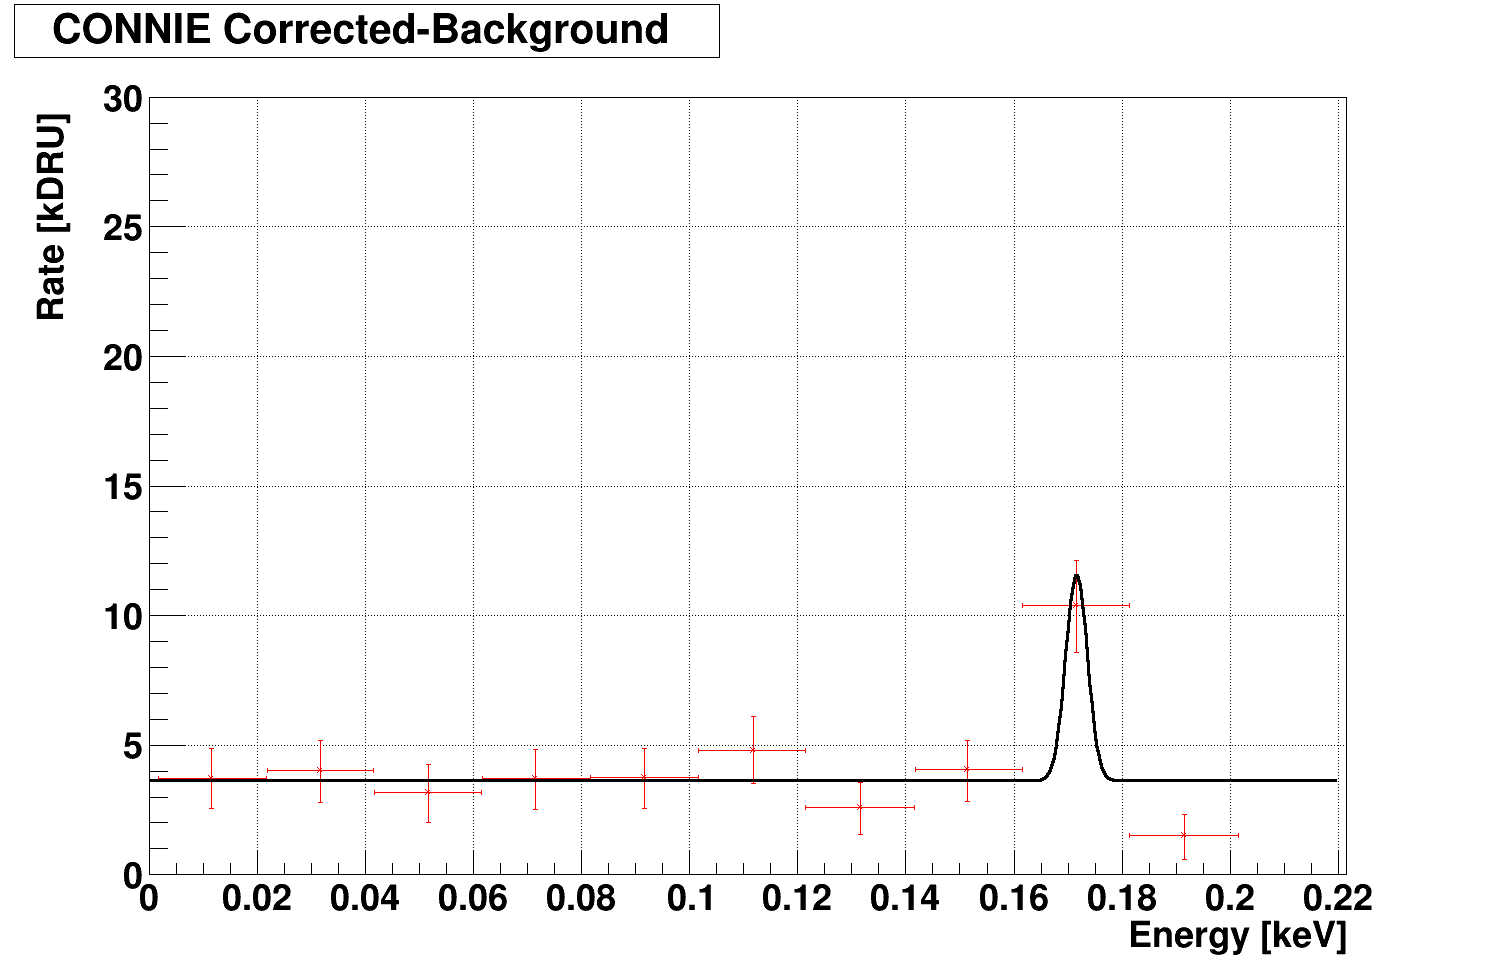

In [198]:
Background_CONNIE = pd.read_csv('CONNIE_Bkg_Un.csv', sep=',').to_numpy()

Bkd_CONNIE_gra = TGraphAsymmErrors()

nline = 0

for line in Background_CONNIE:
    Bkd_CONNIE_gra.SetPoint(nline, line[0]*1e-2, line[1])
    Bkd_CONNIE_gra.SetPointEYhigh(nline, line[3]-line[1])
    Bkd_CONNIE_gra.SetPointEYlow(nline, line[1]-line[2])
    Bkd_CONNIE_gra.SetPointEXhigh(nline, (line[5]-line[0])*1e-2)
    Bkd_CONNIE_gra.SetPointEXlow(nline, (line[0]-line[4])*1e-2)
    nline = nline + 1

Bkgd_CONNIE_TF1 = TF1('Bkgd_CONNIE_TF1', '[0]*(1/(sqrt(2*3.14159*[1]**2)))*exp(-0.5*((x-[2])^2)/[1]**2)+[3]', 0, 0.22, 4)
Bkgd_CONNIE_TF1.SetParameter(0, 0.04)
Bkgd_CONNIE_TF1.SetParameter(1, 0.002)
Bkgd_CONNIE_TF1.SetParameter(2, 0.1716)
Bkgd_CONNIE_TF1.SetParameter(3, 3.62)

Bkgd_CONNIE_TF1.SetNpx(500)

# Bkd_CONNIE_gra.Fit(Bkgd_CONNIE_TF1, 'R')

Bkd_CONNIE_gra.SetTitle('CONNIE Corrected-Background; Energy [keV]; Rate [kDRU] ')
Bkd_CONNIE_gra.SetMarkerColor(2)
Bkd_CONNIE_gra.SetLineColor(2)
Bkd_CONNIE_gra.GetYaxis().SetRangeUser(0,30)

c1 = TCanvas( 'c1', '', 300, 500, 1500, 1000 ) #(puntos en x,puntos en y, size (X,y))

#c1.SetFillColor( 42 )
c1.SetGrid()
#---------Style-----------
gROOT.SetStyle("Plain")
gStyle.SetOptStat(0)
#gPad.SetLogy(1)  #set the canvas in a log mode in y
#---------Style-----------

c1.Draw()
Bkd_CONNIE_gra.Draw('*ap')
Bkgd_CONNIE_TF1.Draw('same')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


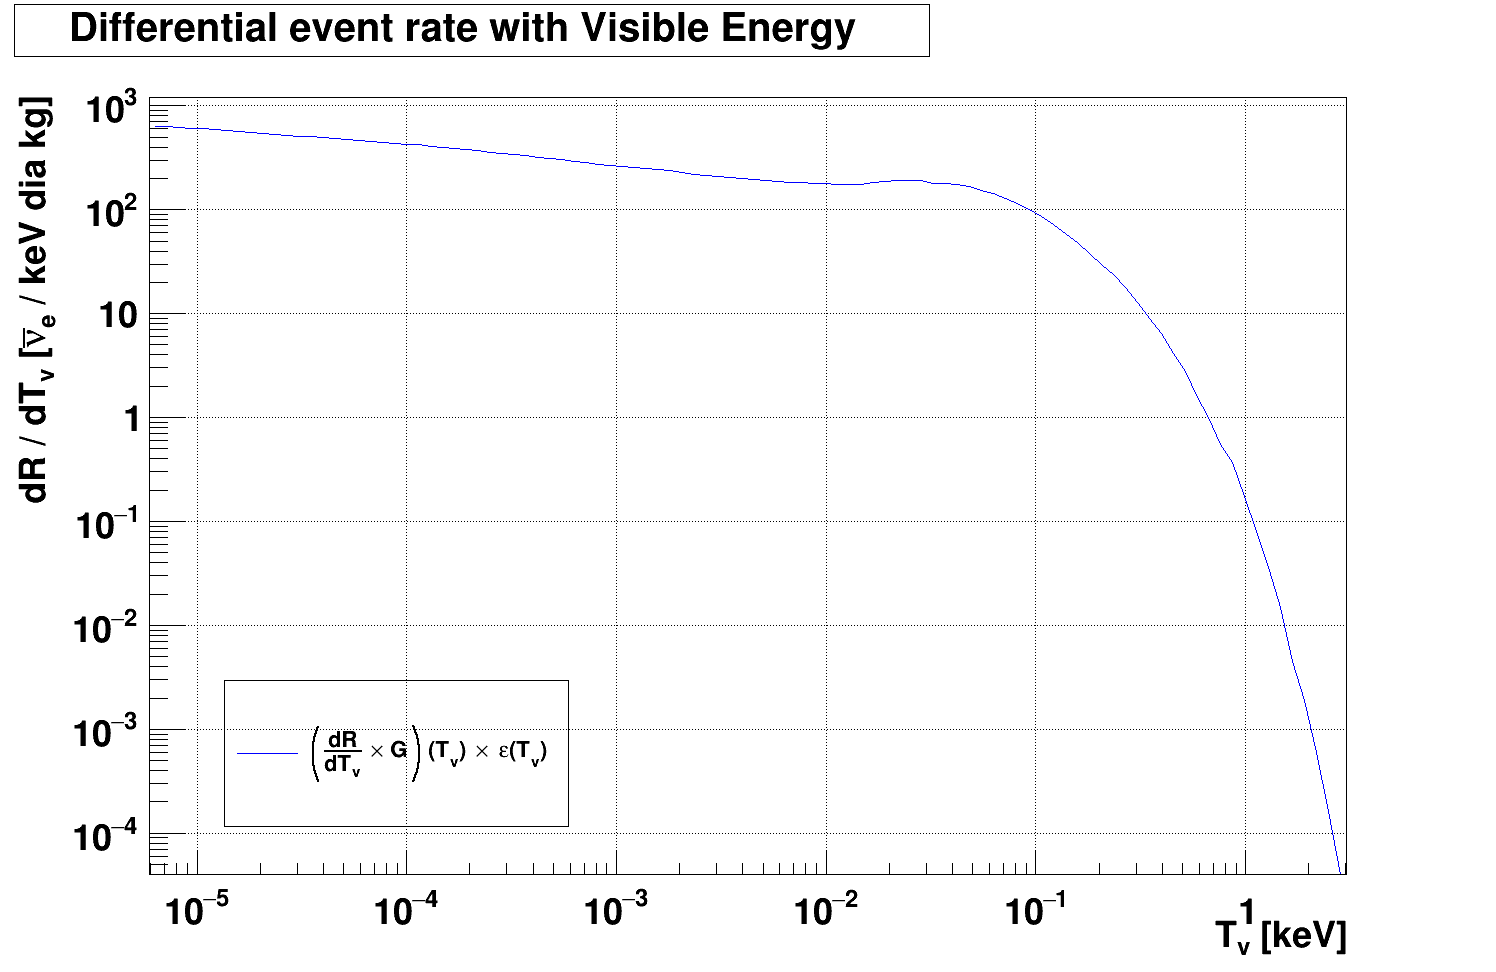

In [204]:
dRateGaussEff_TF1 = TF1('dRateGaussEff_TF1', dRateGaussEff, min(T_v)*1e3, max(T_v)*1e3, 6)
dRateGaussEff_TF1.SetParameter(0, p0)
dRateGaussEff_TF1.SetParameter(1, p1)
dRateGaussEff_TF1.SetParameter(2, p2)
dRateGaussEff_TF1.SetParameter(3, p3)
dRateGaussEff_TF1.SetParameter(4, p4)
dRateGaussEff_TF1.SetParameter(5, 0)

# dRateGaussTv_prime_TF1.SetTitle('Differential event rate with Visible Energy; T_{v} [keV]; dR / dT_{v} [#bar{#nu}_{e} / keV s]')
dRateGaussEff_TF1.SetTitle('Differential event rate with Visible Energy; T_{v} [keV]; dR / dT_{v} [#bar{#nu}_{e} / keV dia kg]')
dRateGaussEff_TF1.GetYaxis().SetTitleOffset(1.2)
# dRateGaussEff_TF1.GetYaxis().SetRangeUser(10e-35, 10e-26)

dRateGaussEff_TF1.SetLineWidth(1)
dRateGaussEff_TF1.SetLineColor(4)

#-----Se crean las leyendas que a parecen en el Canvas ---
leg = TLegend(0.15,0.15,0.38,0.30)
leg.SetFillStyle(0)
leg.SetBorderSize(1)
leg.SetTextSize(0.025)
leg.AddEntry(dRateGaussEff_TF1 , '#left(#frac{dR}{dT_{v}} #times G#right) (T_{v}) #times #varepsilon(T_{v})', 'l')

c1 = TCanvas( 'c1', '', 300, 500, 1500, 1000 ) #(puntos en x,puntos en y, size (X,y))

#c1.SetFillColor( 42 )
c1.SetGrid()
#---------Style-----------
gROOT.SetStyle("Plain")
gStyle.SetOptStat(0)
#gPad.SetLogy(1)  #set the canvas in a log mode in y
#---------Style-----------
c1.SetLogx()
c1.SetLogy()

# dRateGaussTv_prime_TF1.Draw()
dRateGaussEff_TF1.Draw()

c1.Draw()
leg.Draw()


In [ ]:
def dRateGaussTv_prime_keV (x, par):
    
    eval_Tv_prime_keV = x[0]
    p0 = par[0]

    dRateGaussTv_prime_TF1 = TF1('dRateGaussTv_prime_TF1', dRateGaussTv_prime, 10e-14, 10e-1, 1)
    dRateGaussTv_prime_TF1.SetNpx(100)

    val = dRateGaussTv_prime_TF1.Eval(eval_Tv_prime_keV* 1e-3)


    return val

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


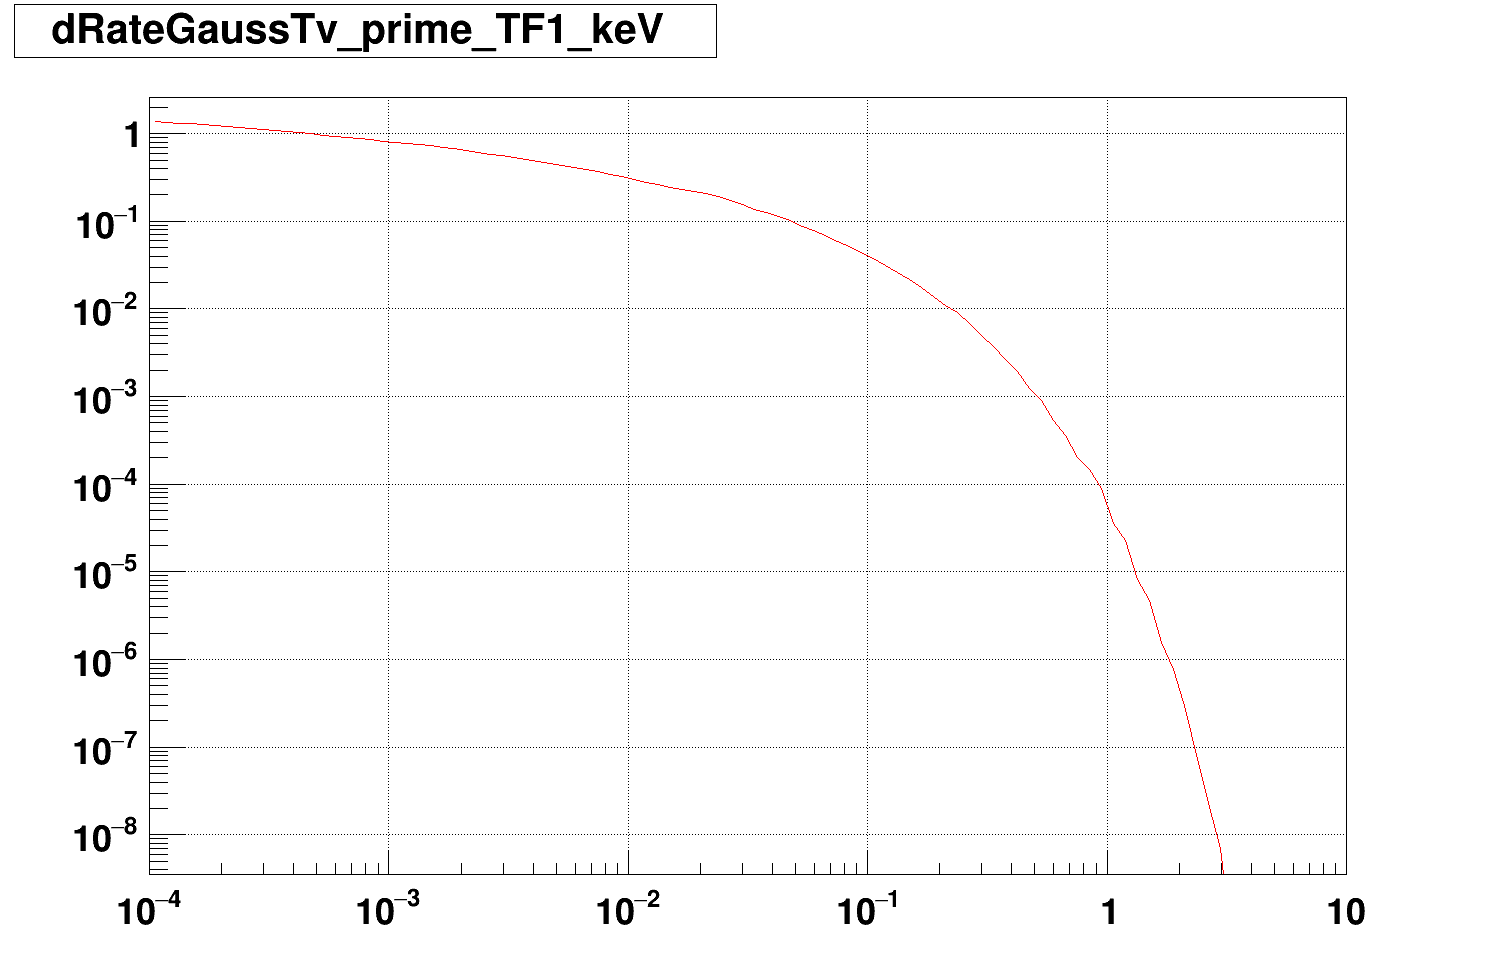

In [ ]:
dRateGaussTv_prime_TF1_keV = TF1('dRateGaussTv_prime_TF1_keV', dRateGaussTv_prime_keV, 10e-5, 10, 1)
dRateGaussTv_prime_TF1_keV.SetNpx(100)
dRateGaussTv_prime_TF1_keV.SetLineWidth(1)
dRateGaussTv_prime_TF1_keV.SetLineColor(2)

c1 = TCanvas( 'c1', '', 300, 500, 1500, 1000 ) #(puntos en x,puntos en y, size (X,y))

#c1.SetFillColor( 42 )
c1.SetGrid()
#---------Style-----------
gROOT.SetStyle("Plain")
gStyle.SetOptStat(0)
#gPad.SetLogy(1)  #set the canvas in a log mode in y
#---------Style-----------
c1.SetLogx()
c1.SetLogy()

# dRatev_TF1.Draw('C')
dRateGaussTv_prime_TF1_keV.Draw()

c1.Draw()


KeyboardInterrupt: void TCanvas::Draw(const char* option = "") =>
    KeyboardInterrupt: double TF1::IntegralFast(int num, double* x, double* w, double a, double b, double* params = 0, double epsilon = 9.9999999999999998E-13) =>
    KeyboardInterrupt: 

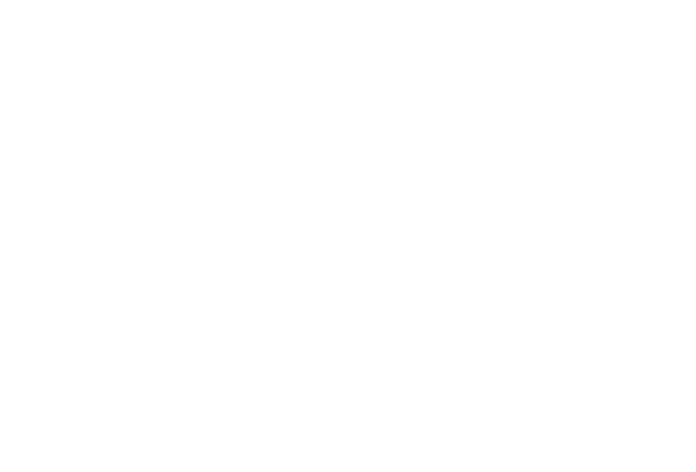

Error in callback <bound method CaptureDrawnPrimitives._post_execute of <JupyROOT.helpers.utils.CaptureDrawnPrimitives object at 0x7f43f4169660>> (for post_execute):


KeyboardInterrupt: void TPad::SaveAs(const char* filename = "", const char* option = "") =>
    KeyboardInterrupt: 

In [70]:
dRateGaussTv_prime_TF1 = TF1('dRateGaussTv_prime_TF1', dRateGaussTv_prime, 0, 10e-2, 1)

c1 = TCanvas()
c1.SetLogx()
c1.SetLogy()

dRateGaussTv_prime_TF1.Draw()
c1.Draw()

In [33]:
def dRate_V_eff(x,par):
    
    t_v = x[0]
    p0 = par[0]
    p1 = par[1]
    p2 = par[2]
    p3 = par[3]
    p4 = par[4]
    p5 = par[5]
    p6 = par[6] * 1e6

    dRatev_TF1 = TF1('dRatev_TF1', dRate_V, min(T_v), max(T_v), 2)

    dRatev_TF1.SetParameter(0, min(T_v))
    dRatev_TF1.SetParameter(1, max(T_v))

    Skipper_Eff = TF1('Skipper_Eff', skipper_eff, 0, p6, 6)
    Skipper_Eff.SetParameter(0, p0)
    Skipper_Eff.SetParameter(1, p1)
    Skipper_Eff.SetParameter(2, p2)
    Skipper_Eff.SetParameter(3, p3)
    Skipper_Eff.SetParameter(4, p4)
    Skipper_Eff.SetParameter(5, p5)

    result = dRatev_TF1.Eval(t_v) * Skipper_Eff.Eval(t_v*1e6)

    return result
    

In [34]:
x = min(T_v) * 1e6
Skipper_Eff.Eval(x)

0.08183930498823898

In [35]:
dRate_V_eff([min(T_v)], [p0, p1, p2, p3, p4, 0 , max(T_v)] )

3.427253158636715e-12

In [36]:
dRatev_TF1.Eval(min(T_v))

4.187783802818513e-11

In [37]:
min(T_v) * 1e6

0.005934008281121903

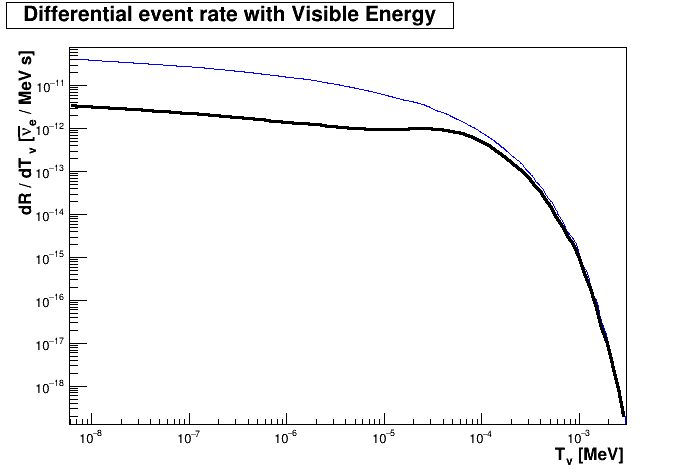

In [38]:
dRate_V_Eff = TF1('dRate_V_Eff', dRate_V_eff, min(T_v), max(T_v), 7 )

dRate_V_Eff.SetParameter(0, p0)
dRate_V_Eff.SetParameter(1, p1)
dRate_V_Eff.SetParameter(2, p2)
dRate_V_Eff.SetParameter(3, p3)
dRate_V_Eff.SetParameter(4, p4)
dRate_V_Eff.SetParameter(5, 0)
dRate_V_Eff.SetParameter(6, max(T_v))

c1 = TCanvas()
c1.SetLogx()
c1.SetLogy()

dRatev_TF1.Draw('C')
dRate_V_Eff.Draw('same')
c1.Draw()


In [39]:
def diffrate(x, par):

    T    = x[0]
    Emax = par[0]

    Emin = 0.5*( T + math.sqrt(math.pow(T,2)+2*T*M_Si))

    fddRate = TF1("fddRate1", ddRate, 0, Emax, 1)
    fddRate.SetParameter(0, T)
    # fddRate.SetNpx(500)

    ns = 1000

    x = array('d', [0.0] * ns) 
    w = array('d', [0.0] * ns) 


    fddRate.CalcGaussLegendreSamplingPoints(ns, x, w, 1e-15)
    ifddRate = fddRate.IntegralFast(ns, x, w, Emin, Emax)

    return ifddRate

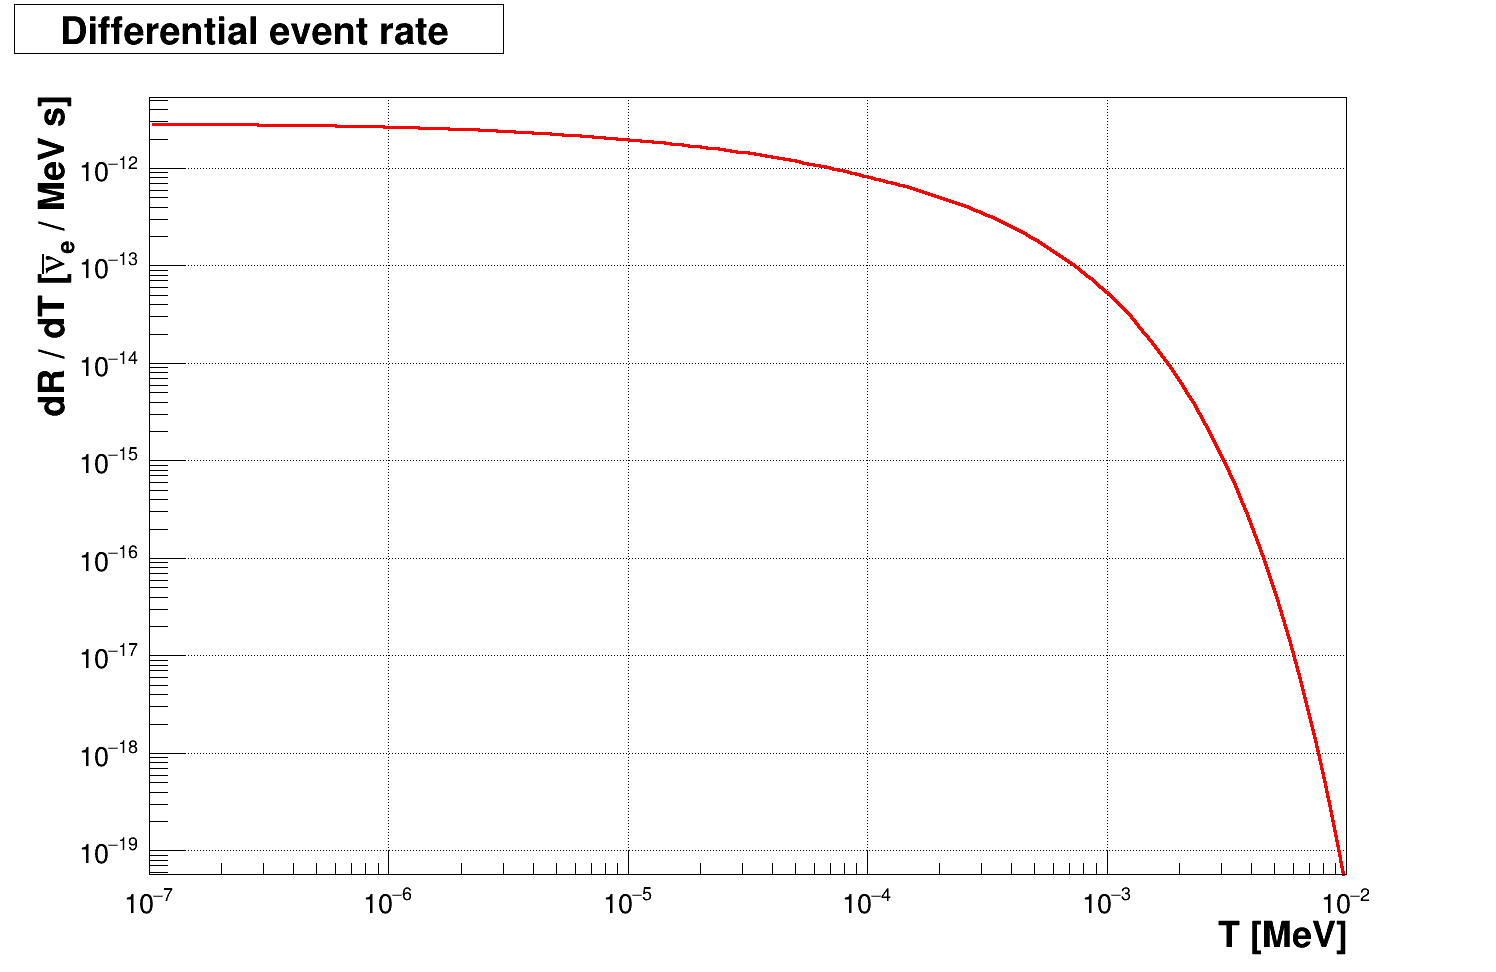

In [40]:
diffRate = TF1('diffRate', diffrate, 10e-8, 10e-3, 1)
diffRate.SetParameter(0, 14)
diffRate.SetLineColor(2)
diffRate.SetNpx(200)

diffRate.SetTitle('Differential event rate; T [MeV]; dR / dT [#bar{#nu}_{e} / MeV s]')
diffRate.GetXaxis().SetTitleOffset(1.4)
diffRate.GetXaxis().SetTitleOffset(1.0)

diffRate.GetXaxis().SetLabelFont(42)  # Tipo de letra 42 (Helvetica)
diffRate.GetXaxis().SetLabelSize(0.03)  # Tamaño de la fuente para las etiquetas del eje X

diffRate.GetYaxis().SetLabelFont(42)
diffRate.GetYaxis().SetLabelSize(0.03)  # Tamaño de la fuente para las etiquetas del eje Y

c1 = TCanvas( 'c1', '', 300, 500, 1500, 1000 ) #(puntos en x,puntos en y, size (X,y))

#c1.SetFillColor( 42 )
c1.SetGrid()
#---------Style-----------
gROOT.SetStyle("Plain")
gStyle.SetOptStat(0)
#gPad.SetLogy(1)  #set the canvas in a log mode in y
#---------Style-----------
c1.SetLogy()
c1.SetLogx()


diffRate.Draw()

c1.Draw()
# c1.Print('DifferentialEvenRateTF1LV.pdf')

In [41]:
def diffratequench(x ,par):
    
    T    = x[0]
    Emax = par[0]
    A    = par[1]
    

    # This is the function of the theorietical Differential Event Rate
    diffRate = TF1('diffRate', diffrate, 10e-8, 10e-3, 1)
    diffRate.SetParameter(0, Emax)

    # This line is the Function of Quenching factor by Lindhard
    Quench = TF1('Quench', quenching, 0, 30, 1)
    Quench.SetParameter(0, A)

     # This line is the derivative Function of Quenching factor by Lindhard
    deQuench = TF1('deQuench', diffquenching, 0, 30, 1)
    deQuench.SetParameter(0, A)

    T_keV = T*1e3

    T_real = math.pow((Quench.Eval(T_keV) + T_keV * deQuench.Eval(T_keV)), -1) * diffRate.Eval(T)

    return T_real

    

KeyboardInterrupt: void TCanvas::Draw(const char* option = "") =>
    KeyboardInterrupt: double TF1::IntegralFast(int num, double* x, double* w, double a, double b, double* params = 0, double epsilon = 9.9999999999999998E-13) =>
    KeyboardInterrupt: double TF1::Eval(double x, double y = 0, double z = 0, double t = 0) =>
    KeyboardInterrupt: 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


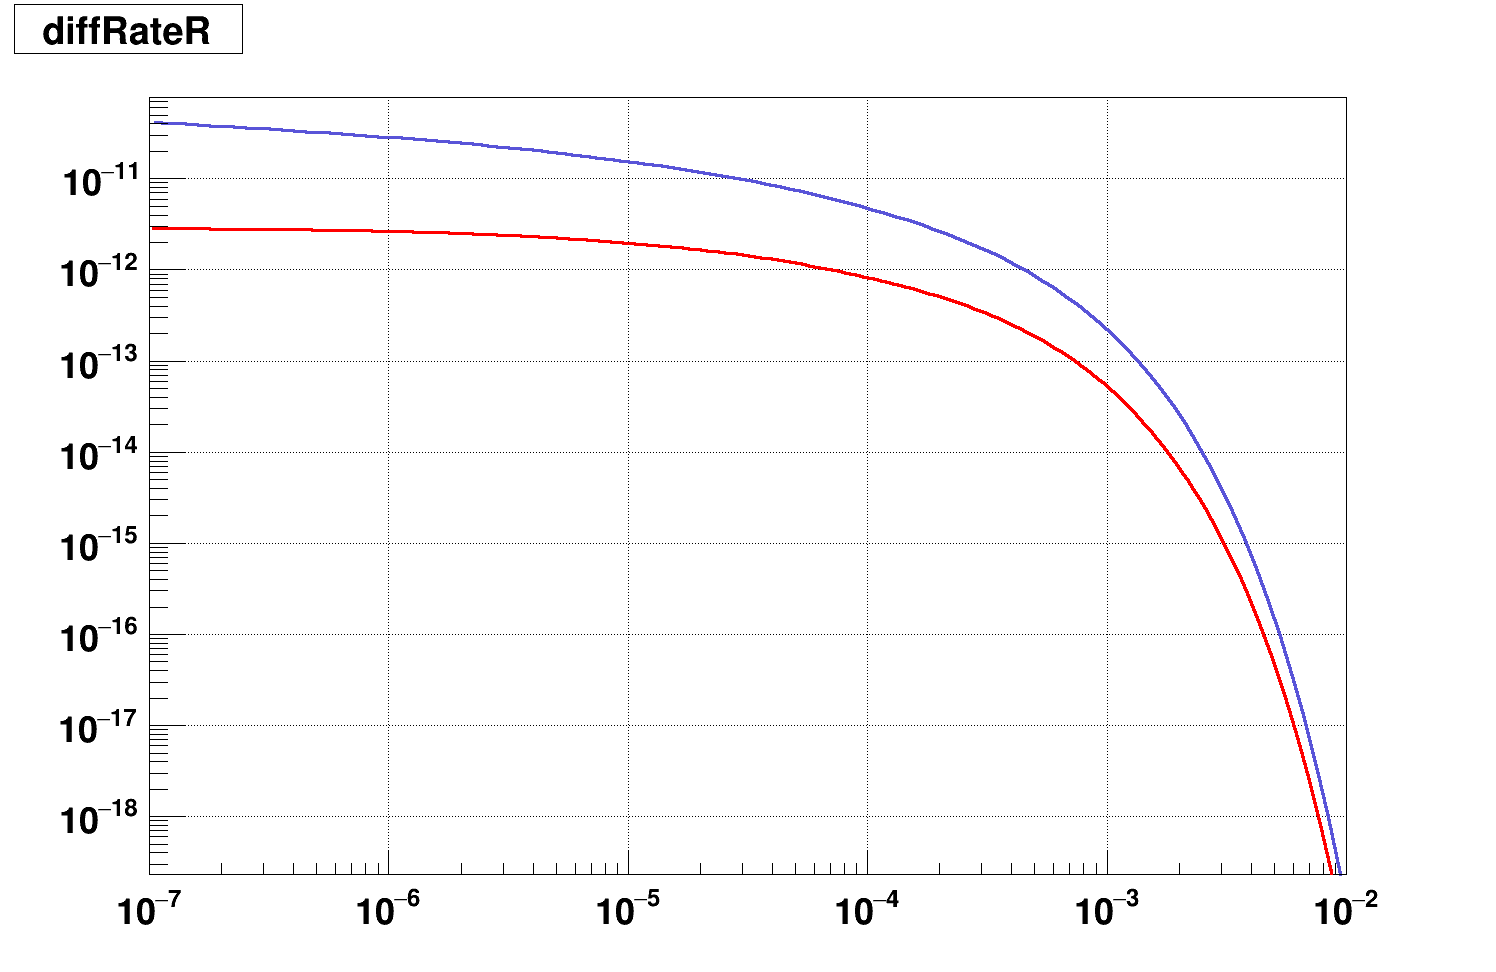

In [42]:
diffRateR = TF1('diffRateR', diffratequench, 10e-8, 10e-3, 2)
diffRateR.SetParameter(0, 14)
diffRateR.SetParameter(1, Si_amu)
diffRateR.SetLineColor(9)

c1 = TCanvas( 'c1', '', 300, 500, 1500, 1000 ) #(puntos en x,puntos en y, size (X,y))

#c1.SetFillColor( 42 )
c1.SetGrid()
#---------Style-----------
gROOT.SetStyle("Plain")
gStyle.SetOptStat(0)
#gPad.SetLogy(1)  #set the canvas in a log mode in y
#---------Style-----------
c1.SetLogy()
c1.SetLogx()

diffRateR.Draw()
diffRate.Draw('same')

c1.Draw()
# c1.Print('DifferentialEvenRateQuench.pdf')